# **Your first inner join**

You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the `taxi_owners` and `taxi_veh` tables together on the `vid` column. You can then use the merged table along with the `.value_counts()` method to find the most common `fuel_type`.

* Merge `taxi_owners` with `taxi_veh` on the column `vid`, and save the result to `taxi_own_veh`.
* Set the left and right table suffixes for overlapping columns of the merge to `_own` and `_veh`, respectively.
* Select the `fuel_type` column from `taxi_own_veh` and print the `value_counts()` to find the most popular `fuel_types` used.

In [ ]:
import pandas as pd 

taxi_owners = pd.read_pickle("taxi_owners.p")
taxi_veh = pd.read_pickle("taxi_vehicles.p")

print("Taxi Owners")
display(taxi_owners.head(2))
print("\n")
print("Taxi Vehicles")
display(taxi_veh.head(2))
print("\n")

# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid")

# Print the column names of the taxi_own_veh 
print("Taxi owners merged with Taxi vehicles on 'vid' column")
display(taxi_own_veh.head(2))
print("\n\n\n")

# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=["_own", "_veh"])
display(taxi_own_veh.head(2))
print("\n\n\n")

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh["fuel_type"].value_counts())

Taxi Owners


,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659




Taxi Vehicles


,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.




Taxi owners merged with Taxi vehicles on 'vid' column


,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.


,rid,vid,owner_own,address,zip,make,model,year,fuel_type,owner_veh
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.






HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


# **Inner joins and number of rows returned**

All of the merges you have studied to this point are called ***inner joins***. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the `wards` and `census` tables, then comparing it to merges of copies of these tables that are slightly altered, named `wards_altered`, and `census_altered`. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.


* Merge `wards` and `census` on the `ward` column and save the result to `wards_census`.
* Merge the `wards_altered` and `census` tables on the `ward` column, and notice the difference in returned rows.
* Merge the `wards` and `census_altered` tables on the `ward` column, and notice the difference in returned rows.

In [ ]:
from copy import deepcopy
wards = pd.read_pickle("ward.p")
census = pd.read_pickle("census.p")
wards_altered, census_altered = deepcopy(wards), deepcopy(census)
wards_altered.loc[0, "ward"] = 61
census_altered.loc[0,"ward"] = None

print("Wards Table")
display(wards.head(2))
print("\nWards_Altered Table")
display(wards_altered.head(2))
print("\nCensus Table")
display(census.head(2))
print("\nCensus Altered Table")
display(census_altered.head(2))

# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on="ward")
print('\n\nwards_census table shape:', wards_census.shape)
display(wards_census.head(3))

# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on="ward")
print('\nwards_altered_census table shape:', wards_altered_census.shape)
display(wards_altered_census.head(3))

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on="ward")
print('\nwards_census_altered table shape:', wards_census_altered.shape)
display(wards_census_altered.head(3))

Wards Table


,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622



Wards_Altered Table


,ward,alderman,address,zip
0,61,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622



Census Table


,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622



Census Altered Table


,ward,pop_2000,pop_2010,change,address,zip
0,None,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622




wards_census table shape: (50, 9)


,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653



wards_altered_census table shape: (49, 9)


,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
1,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
2,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653



wards_census_altered table shape: (49, 9)


,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
1,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
2,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653


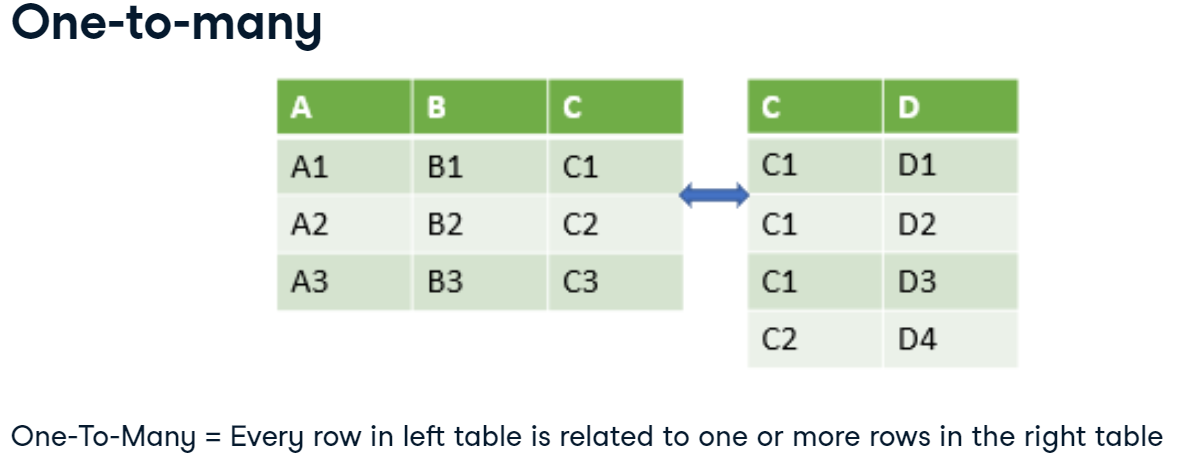

In [42]:
import pandas as pd

wards = pd.read_pickle("ward.p")
licenses = pd.read_pickle("licenses.p")
print("Wards Table")
display(wards[wards["ward"]=="1"].head())
print("\nLicenses Table")
display(licenses[licenses["ward"]=="1"].head())  # ward column เป็น string
print("\n\nWards merged with Licenses: One to many relationship")
display(wards.merge(licenses, on="ward", suffixes=["_ward", "_lic"]).head())

Wards Table


,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647



Licenses Table


,account,ward,aid,business,address,zip
143,12024,1,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
208,14446,1,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
234,14624,1,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
270,14987,1,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
326,15642,1,814,Beat Kitchen,2000-2100 W DIVISION ST,60622




Wards merged with Licenses: One to many relationship


,ward,alderman,address_ward,zip_ward,account,aid,business,address_lic,zip_lic
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


# **One-to-many merge**

A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called `biz_owners`, to the `licenses` table. Recall from the video lesson, with a one-to-many relationship, <ins>a row in the left table may be repeated if it is related to multiple rows in the right table</ins>. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

* Starting with the `licenses` table on the left, merge it to the `biz_owners` table on the column `account`, and save the results to a variable named `licenses_owners`.
* Group `licenses_owners` by `title` and count the number of accounts for each title. Save the result as `counted_df`.
* Sort `counted_df` by the number of accounts in descending order, and save this as a variable named `sorted_df`.
* Use the `.head()` method to print the first few rows of the `sorted_df`.

In [49]:
import pandas as pd

licenses = pd.read_pickle("licenses.p")
biz_owners = pd.read_pickle("business_owners.p")

print("licenses table")
display(licenses.head())
print("\nbiz_owners table")
display(biz_owners.head())

# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on="account")
print("\nlicenses merged to owners table")
display(licenses_owners.head(10))

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby("title").agg({'account':'count'})
print("\n\ncounted_df table")
display(counted_df)

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values(by="account", ascending=False)

# Use .head() method to print the first few rows of sorted_df
print("\n\nSorted counted_df table")
display(sorted_df)

licenses table


,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613



biz_owners table


,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT



licenses merged to owners table


,account,ward,aid,business,address,zip,first_name,last_name,title
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,ROBERT,GLICK,MEMBER
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,PRESIDENT
2,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,SECRETARY
3,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,WALTER,MROZEK,PARTNER
4,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,CELINA,BYRDAK,PARTNER
5,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609,IRENE,ROSENFELD,PRESIDENT
6,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609,CAROL,WARD,SECRETARY
7,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613,JESSICA,DEVOS,SECRETARY
8,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613,CURTIS,JENNETTE,PRESIDENT
9,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613,BRIAN,HAINES,VICE PRESIDENT




counted_df table


,account
title,
ASST. SECRETARY,111
BENEFICIARY,4
CEO,110
DIRECTOR,146
EXECUTIVE DIRECTOR,10
GENERAL PARTNER,21
INDIVIDUAL,268
LIMITED PARTNER,26
MANAGER,134




Sorted counted_df table


,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970
MEMBER,884
MANAGING MEMBER,878
SHAREHOLDER,590
PARTNER,451


After merging the tables together, you counted the number of repeated rows with the combination of .groupby() and .agg() statements. You see that president, followed by secretary, are the most common business owner titles.

# **Merge multiple tables**

## **Total riders in a month**

Your goal is to find the total number of rides provided to passengers passing through the Wilson station (`station_name == 'Wilson'`) when riding Chicago's public transportation system on weekdays (`day_type == 'Weekday'`) in July (`month == 7`). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is below.


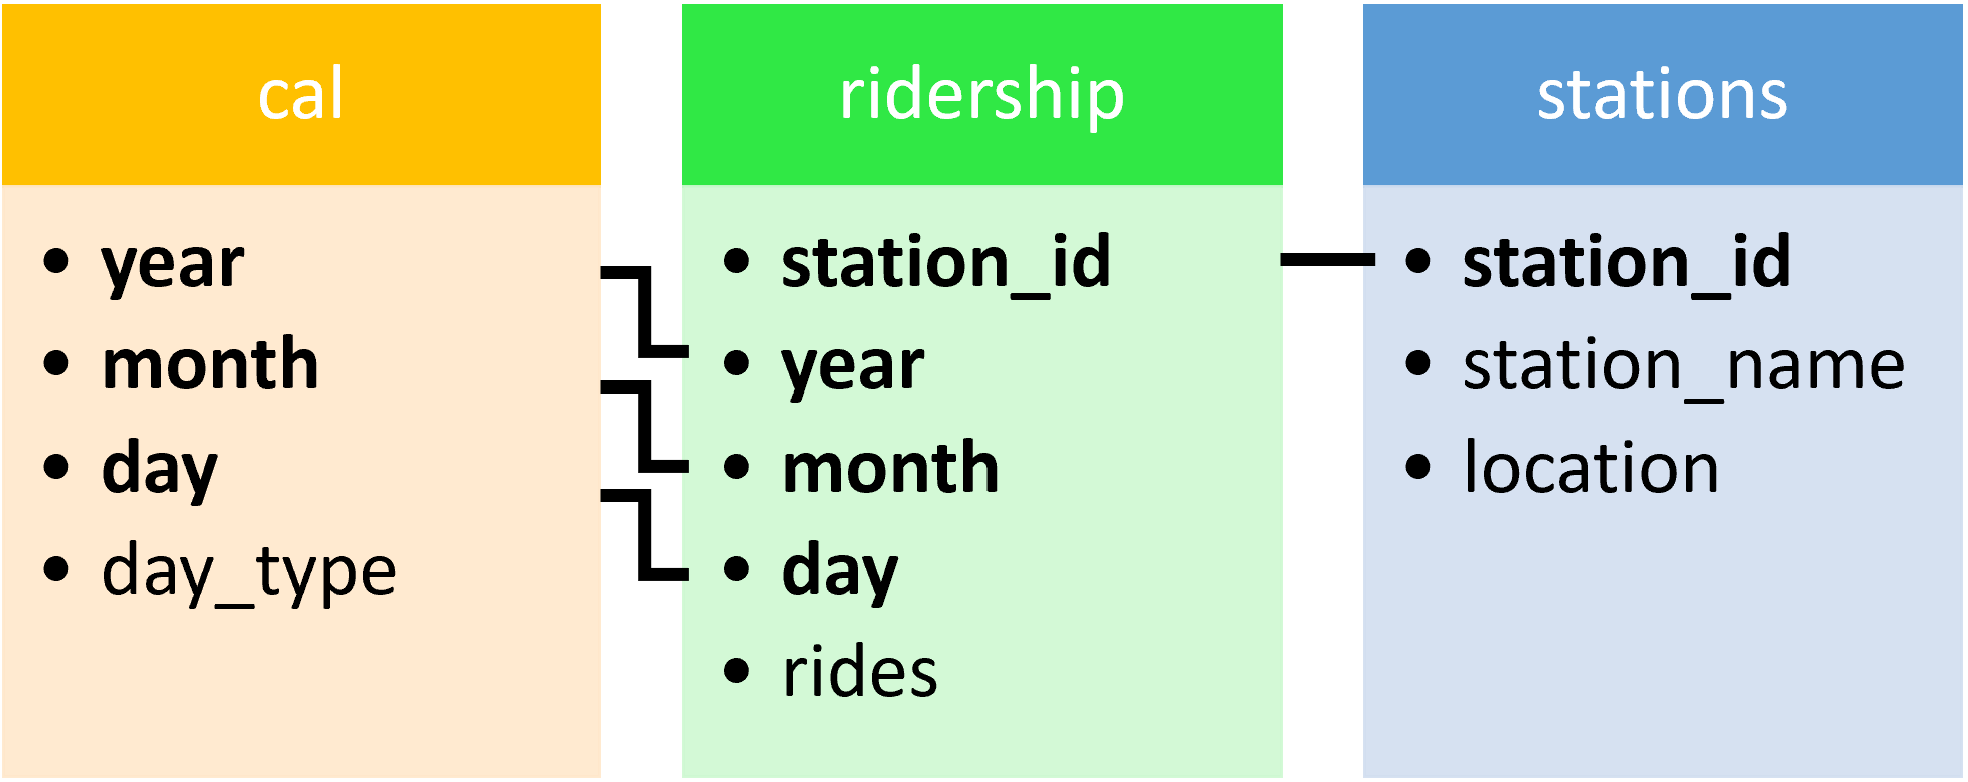

* Merge the `ridership` and `cal` tables together, starting with the `ridership` table on the left and save the result to the variable `ridership_cal`. If you code takes too long to run, your merge conditions might be incorrect.\

* Extend the previous merge to three tables by also merging the `stations` table.

* Create a variable called `filter_criteria` to select the appropriate rows from the merged table so that you can sum the `rides` column.

In [67]:
import pandas as pd

ridership = pd.read_pickle("cta_ridership.p")
cal = pd.read_pickle("cta_calendar.p")
stations = pd.read_pickle("stations.p")

print("ridership table")
display(ridership.head())
print("\ncal table")
display(cal.head())
print("\nstations table")
display(stations.head())

# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=["year", "month", "day"])
print("\nridership merged with cal")
display(ridership_cal.head())

# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']).merge(stations, on="station_id")
print("\nridership_cal_stations table")
display(ridership_cal_stations.head())

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print("\n\n\nThe total number of rides provided to passengers passing through the Wilson station when riding Chicago's public transportation system on weekdays in July=\n",ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

ridership table


,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719



cal table


,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday



stations table


,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"



ridership merged with cal


,station_id,year,month,day,rides,day_type
0,40010,2019,1,1,576,Sunday/Holiday
1,40080,2019,1,1,1839,Sunday/Holiday
2,40770,2019,1,1,2724,Sunday/Holiday
3,40120,2019,1,1,754,Sunday/Holiday
4,40540,2019,1,1,2175,Sunday/Holiday



ridership_cal_stations table


,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"





The total number of rides provided to passengers passing through the Wilson station when riding Chicago's public transportation system on weekdays in July=
 140005


## **Three table merge**

A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. You will merge the `licenses` and `wards` tables with this new income-by-zip-code table called `zip_demo`.

* Starting with the `licenses` table, merge to it the `zip_demo` table on the `zip` column. Then merge the resulting table to the `wards` table on the `ward` column. Save result of the three merged tables to a variable named `licenses_zip_ward`.
* Group the results of the three merged tables by the column `alderman` and find the median `income`.

In [79]:
licenses = pd.read_pickle("licenses.p")
wards = pd.read_pickle("ward.p")
zip_demo = pd.read_pickle("zip_demo.p")

print("wards table")
display(wards.head())
print("\nlicenses table")
display(licenses.head())
print("\nzip_demo table")
display(zip_demo.head())

# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on="zip").merge(wards, on=["ward"])

# Print the results by alderman and show median income
print("\n\n\nMedian income by alderman")
display(licenses_zip_ward.groupby("alderman").agg({'income':'median'}))

wards table


,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649



licenses table


,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613



zip_demo table


,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226





Median income by alderman


,income
alderman,
Ameya Pawar,66246
Anthony A. Beale,38206
Anthony V. Napolitano,82226
Ariel E. Reyboras,41307
Brendan Reilly,110215
Brian Hopkins,87143
Carlos Ramirez-Rosa,66246
Carrie M. Austin,38206
Chris Taliaferro,55566


## **One-to-many merge with multiple tables**

You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The `land_use` table has info on the percentage of vacant land by city ward. The `census` table has population by `ward`, and the `licenses` table lists businesses by ward.


* Merge `land_use` and `census` on the `ward` column. Merge the result of this with `licenses` on the `ward` column, using the suffix `_cen` for the left table and `_lic` for the right table. Save this to the variable `land_cen_lic`
* Group `land_cen_lic` by `ward`, `pop_2010` (the population in 2010), and `vacant`, then count the number of accounts. Save the results to `pop_vac_lic`.
* Sort `pop_vac_lic` by `vacant`, `account`, and `pop_2010` in descending, ascending, and ascending order respectively. Save it as `sorted_pop_vac_lic`.

In [84]:
licenses = pd.read_pickle("licenses.p")
wards = pd.read_pickle("ward.p")
land_use = pd.read_pickle("land_use.p")

print("wards table")
display(wards.head())
print("\nlicenses table")
display(licenses.head())
print("\nland_use table")
display(land_use.head())

# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on="ward").merge(licenses, on="ward", suffixes=["_cen", "_lic"])
print("\n\n\n land_use merged with census and licenses")
display(land_cen_lic.head())

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(["ward", "pop_2010", "vacant"], as_index=False).agg({'account':'count'})
sorted_pop_vac_lic = pop_vac_lic.sort_values(by=["vacant", "account", "pop_2010"], ascending=[False, True, True])
display(sorted_pop_vac_lic.head())

wards table


,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649



licenses table


,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613



land_use table


,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68





 land_use merged with census and licenses


,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,address_lic,zip_lic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156


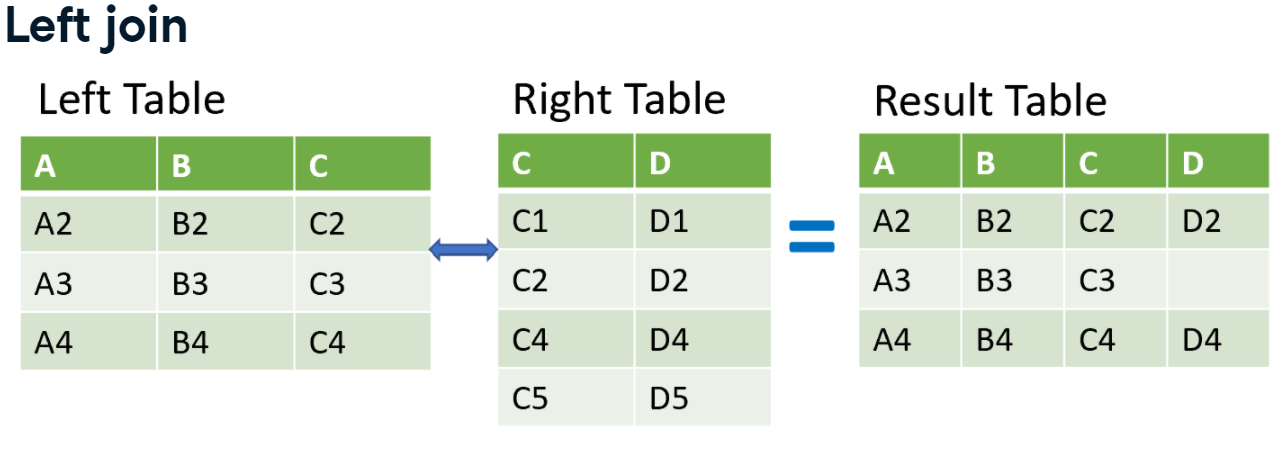



In [5]:
import pandas as pd

movies = pd.read_pickle("movies.p")
taglines = pd.read_pickle("taglines.p")

print("Movies Table")
print(movies.shape)
display(movies.head())
print("\nTaglines Table")
print(taglines.shape)
display(taglines.head())

Movies Table
(4803, 4)


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17



Taglines Table
(3955, 2)


,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


จะเห็นว่า `taglines` มีจำนวนแถวที่น้อยกว่า `movies` นั่นคือถ้า left join มา จะต้องมี แถวที่ `tagline` มีค่าเป็น `NaN`

In [9]:
print("Movies left joins taglines")
print(movies.merge(taglines, on="id", how="left").shape)
display(movies.merge(taglines, on="id", how="left").head())

Movies left joins taglines
(4803, 5)


,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


## **Counting missing rows with left join**

The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the `movies` table and the `financials` table.

* Merge the `movies` table, as the left table, with the `financials` table using a left join, and save the result to `movies_financials`.
* Count the number of rows in `movies_financials` with a null value in the `budget` column.

In [13]:
import pandas as pd

movies = pd.read_pickle("movies.p")
financials = pd.read_pickle("financials.p")

print("Movies Table")
print(movies.shape)
display(movies.head())
print("Financials Table")
print(financials.shape)
display(financials.head())

# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on="id", how="left")
print("\n\n\nMovies left join financials")
print(movies_financials.shape)
display(movies_financials.head())

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()
print(number_of_missing_fin)
print("This equals the number of rows in movies minus the number of rows in financials.")

Movies Table
(4803, 4)


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


Financials Table
(3229, 3)


,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08





Movies left join financials
(4803, 6)


,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


1574
This equals the number of rows in movies minus the number of rows in financials.


You used a left join to find out which rows in the `financials` table were missing data.

## **Enriching a dataset**

Setting `how='left'` with the `.merge()` method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

* Merge `toy_story` and `taglines` on the `id` column with a left join, and save the result as `toystory_tag`.
* With `toy_story` as the left table, merge to it `taglines` on the `id` column with an inner join, and save as `toystory_tag`.

In [16]:
import pandas as pd

movies = pd.read_pickle("movies.p")
taglines = pd.read_pickle("taglines.p")
toy_story = movies[movies["title"].str.contains("Toy Story")]


print("Toy Story Table")
print(toy_story.shape)
display(toy_story.head())
print("\nTaglines Table")
print(taglines.shape)
display(taglines.head())

# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on="id", how="left")

# Print the rows and shape of toystory_tag
print("\n\nToy story left joins taglines")
print(toystory_tag.shape)
display(toystory_tag)

# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on="id")
print("\n\nToy story inner join taglines")
print(toystory_tag.shape)
display(toystory_tag)


Toy Story Table
(3, 4)


,id,title,popularity,release_date
103,10193,Toy Story 3,59.995418,2010-06-16
2637,863,Toy Story 2,73.575118,1999-10-30
3716,862,Toy Story,73.640445,1995-10-30



Taglines Table
(3955, 2)


,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."




Toy story left joins taglines
(3, 5)


,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!
2,862,Toy Story,73.640445,1995-10-30,NaN




Toy story inner join taglines
(2, 5)


,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!


If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.   Therefore, the returned rows must be equal to the left table in one-to-one relationship and greater than the number of rows in the left table in one-to-many relationship.

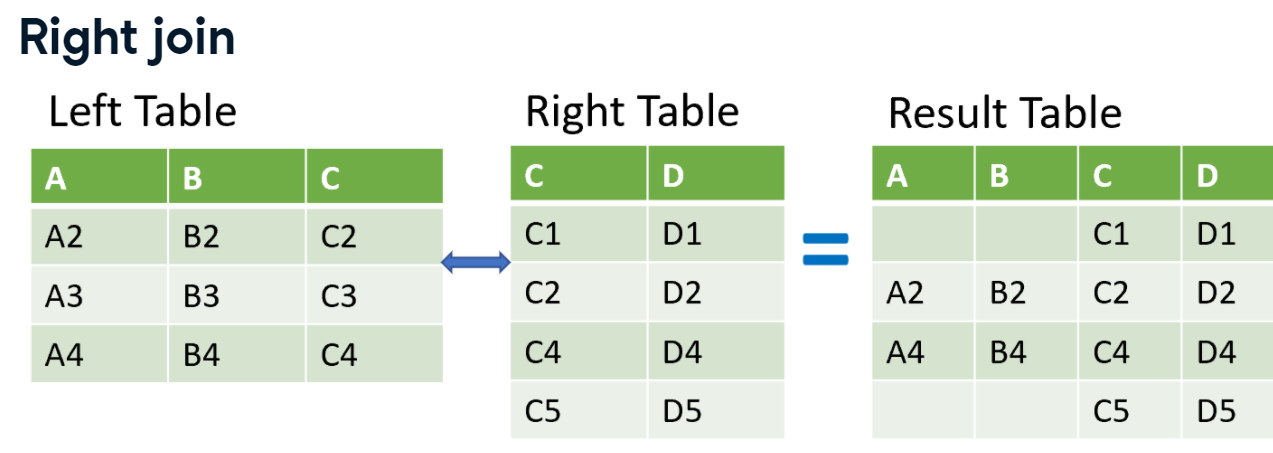

In [35]:
import pandas as pd

movies = pd.read_pickle("movies.p")
financials = pd.read_pickle("financials.p")

print("Movies Table")
print(movies.shape)
display(movies.head())

movie_to_genres = pd.read_pickle("movie_to_genres.p")
tv_genre = movie_to_genres[movie_to_genres["genre"]=="TV Movie"]
print("\n\ntv_genre table")
print(tv_genre.shape)
display(tv_genre)

tv_movies = movies.merge(tv_genre, how="right", left_on="id", right_on="movie_id")
print("\n\n\nMovies right join TV movies")
print(tv_movies.shape)
display(tv_movies)

Movies Table
(4803, 4)


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17




tv_genre table
(8, 2)


,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie
10835,158150,TV Movie
11096,205321,TV Movie
11282,231617,TV Movie





Movies right join TV movies
(8, 6)


,id,title,popularity,release_date,movie_id,genre
0,10947,High School Musical,16.536374,2006-01-20,10947,TV Movie
1,13187,A Charlie Brown Christmas,8.701183,1965-12-09,13187,TV Movie
2,22488,Love's Abiding Joy,1.128559,2006-10-06,22488,TV Movie
3,78814,We Have Your Husband,0.102003,2011-11-12,78814,TV Movie
4,153397,Restless,0.812776,2012-12-07,153397,TV Movie
5,158150,How to Fall in Love,1.923514,2012-07-21,158150,TV Movie
6,205321,Sharknado,20.466433,2013-07-11,205321,TV Movie
7,231617,"Signed, Sealed, Delivered",1.444476,2013-10-13,231617,TV Movie


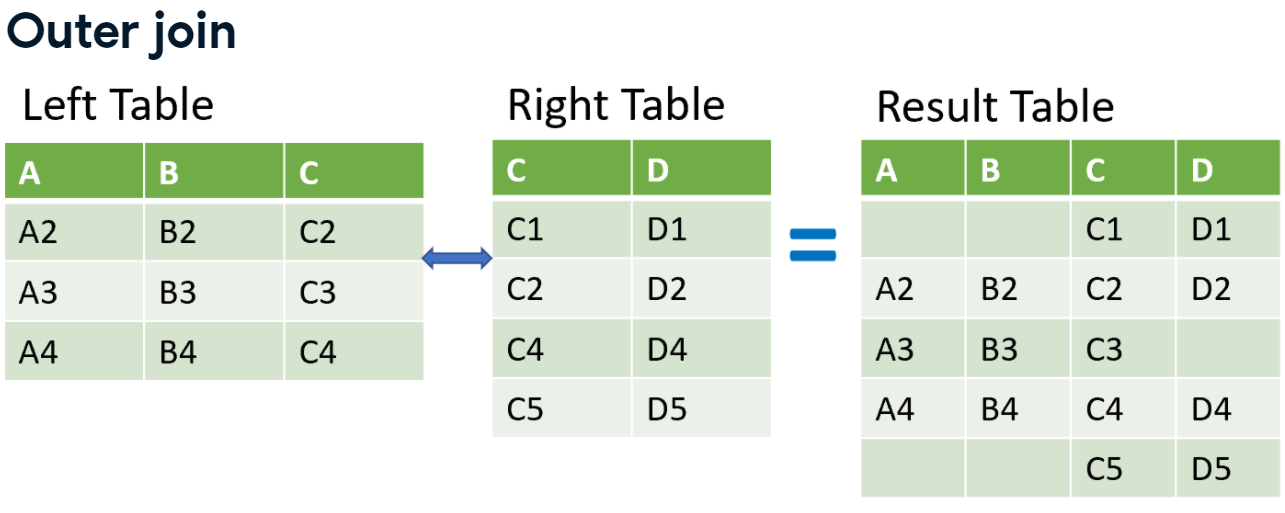

In [26]:
family = movie_to_genres[movie_to_genres['genre'] == 'Family'].head(3).reset_index(drop=True)
comedy = movie_to_genres[movie_to_genres['genre'] == 'Comedy'].head(3).reset_index(drop=True)
print("family table")
display(family)
print("\n\ncomedy table")
display(comedy)

family_comedy = family.merge(comedy, on='movie_id', how='outer', suffixes=('_fam', '_com'))
print("\n\n\n\nfamily outer join comedy")
display(family_comedy)


family table


,movie_id,genre
0,12,Family
1,35,Family
2,105,Family




comedy table


,movie_id,genre
0,5,Comedy
1,13,Comedy
2,35,Comedy






family outer join comedy


,movie_id,genre_fam,genre_com
0,12,Family,NaN
1,35,Family,Comedy
2,105,Family,NaN
3,5,NaN,Comedy
4,13,NaN,Comedy


## **Right join to find unique movies**

You are given a table of science fiction movies called `scifi_movies` and another table of action movies called `action_movies`. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the `movies` table in to see the movie names. 

* Merge `action_movies` and `scifi_movies` tables with a **right join** on `movie_idv. Save the result as `action_scifi`.
* Update the merge to add `suffixes`, where `'_act'` and `'_sci'` are suffixes for the left and right tables, respectively.
* From `action_scifi`, subset only the rows where the `genre_act` column is null.
* Merge `movies` and `scifi_only` using the `id` column in the left table and the `movie_id` column in the right table with an inner join.

In [34]:
import pandas as pd

movies = pd.read_pickle("movies.p")
movie_to_genres = pd.read_pickle("movie_to_genres.p")
action_movies = movie_to_genres[movie_to_genres["genre"]=="Action"] 
scifi_movies  = movie_to_genres[movie_to_genres["genre"]=="Science Fiction"]

print("Movies Table")
print(movies.shape)
display(movies.head())

print("\n\naction_movies")
print(action_movies.shape)
display(action_movies.head())

print("\n\nscifi_movies")
print(scifi_movies.shape)
display(scifi_movies.head())

# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on="movie_id", how="right")
print("\n\naction_movies right join scifi_movies")
print(action_scifi.shape)
display(action_scifi.head())

# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=["_act", "_sci"])
print("\n\naction_movies right join scifi_movies with suffixes")
print(action_scifi.shape)
display(action_scifi.head())

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi["genre_act"].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on="id", right_on="movie_id")

print("\n\n\nmovies_and_scifi_only")
print(movies_and_scifi_only.shape)
display(movies_and_scifi_only.head())



Movies Table
(4803, 4)


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17




action_movies
(1154, 2)


,movie_id,genre
3,11,Action
14,18,Action
25,22,Action
26,24,Action
42,58,Action




scifi_movies
(535, 2)


,movie_id,genre
2,11,Science Fiction
17,18,Science Fiction
20,19,Science Fiction
38,38,Science Fiction
49,62,Science Fiction




action_movies right join scifi_movies
(535, 3)


,movie_id,genre_x,genre_y
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction




action_movies right join scifi_movies with suffixes
(535, 3)


,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction





movies_and_scifi_only
(258, 7)


,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


## **Popular genres with right join**

What are the genres of the most popular movies? To answer this question, you need to merge data from the `movies` and `movie_to_genres` tables. In a table called `pop_movies`, the top 10 most popular movies in the `movies` table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the `movie_to_genres` table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in `pop_movies` that column is called `id`, and in movies_to_genres it's called `movie_id`.

* Merge `movie_to_genres` and `pop_movies` using a right join. Save the results as `genres_movies`.
* Group `genres_movies` by `genre` and count the number of `id` values.

Movies to Genre Table
(12160, 2)


,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure



Pop Movies Table
(10, 4)


,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13





Movie to Genre right join Pop movies
(36, 6)


,movie_id,genre,id,title,popularity,release_date
0,211672,Comedy,211672,Minions,875.581305,2015-06-17
1,211672,Adventure,211672,Minions,875.581305,2015-06-17
2,211672,Animation,211672,Minions,875.581305,2015-06-17
3,211672,Family,211672,Minions,875.581305,2015-06-17
4,157336,Drama,157336,Interstellar,724.247784,2014-11-05


genre_count
(9, 1)


,id
genre,
Adventure,9
Action,7
Science Fiction,6
Thriller,4
Comedy,3
Animation,2
Drama,2
Family,2
Fantasy,1


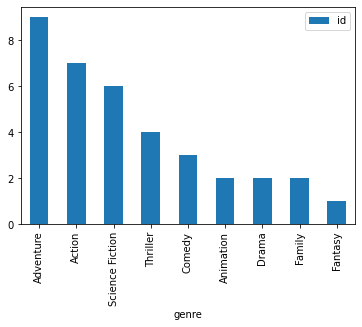

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_pickle("movies.p")
movie_to_genres = pd.read_pickle("movie_to_genres.p")
pop_movies = movies.sort_values(by="popularity", ascending=False).head(10)

print("Movies to Genre Table")
print(movie_to_genres.shape)
display(movie_to_genres.head())

print("\nPop Movies Table")
print(pop_movies.shape)
display(pop_movies.head())

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', left_on="movie_id", right_on="id")
print("\n\n\nMovie to Genre right join Pop movies")
print(genres_movies.shape)
display(genres_movies.head())

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'}).sort_values(by="id", ascending=False)
print("genre_count")
print(genre_count.shape)
display(genre_count)

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

## **Using outer join to select actors**

One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called `iron_1_actors`, and Iron Man 2 table is called `iron_2_actors`. 

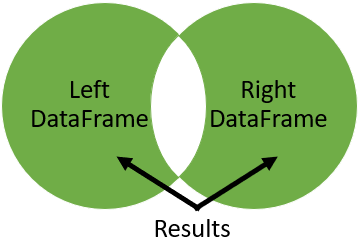  


* Save to `iron_1_and_2` the merge of `iron_1_actors` (left) with `iron_2_actors` tables with an outer join on the `id` column, and set `suffixes` to `('_1','_2')`.
* Create an index that returns `True` if `name_1` or `name_2` are null, and `False` otherwise.

In [60]:
import pandas as pd

casts = pd.read_pickle("casts.p")
movies = pd.read_pickle("movies.p")
iron_1_actors = movies[movies["title"]=="Iron Man"].merge(casts, left_on="id", right_on="movie_id")[["character", "id_y",	"name"]].rename(columns={"id_y":"id"})
iron_2_actors = movies[movies["title"]=="Iron Man 2"].merge(casts, left_on="id", right_on="movie_id")[["character", "id_y",	"name"]].rename(columns={"id_y":"id"})

print("iron_1_actors")
print(iron_1_actors.shape)
display(iron_1_actors.head())

print("\niron_2_actors")
print(iron_2_actors.shape)
display(iron_2_actors.head())

# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on="id",how="outer", suffixes=["_1", "_2"])

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print("\n\n\n\nFor actors who only played 1 or 2 but not both")
display(iron_1_and_2[m].tail(5))
display(iron_1_and_2[m].head(5))

iron_1_actors
(87, 3)


,character,id,name
0,Yinsen,17857,Shaun Toub
1,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges
3,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",18288,Terrence Howard
4,Christine Everhart,57451,Leslie Bibb



iron_2_actors
(115, 3)


,character,id,name
0,Ivan Vanko / Whiplash,2295,Mickey Rourke
1,Natalie Rushman / Natasha Romanoff / Black Widow,1245,Scarlett Johansson
2,Justin Hammer,6807,Sam Rockwell
3,Director Nick Fury,2231,Samuel L. Jackson
4,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow






For actors who only played 1 or 2 but not both


,character_1,id,name_1,character_2,name_2
186,NaN,92189,NaN,Party Guest (uncredited),Doug Swander
187,NaN,1265840,NaN,US Senator (uncredited),Michael A. Templeton
188,NaN,1265841,NaN,Background (uncredited),Rosa Tyabji
189,NaN,1122811,NaN,Tony Stark Usher (uncredited),Peter Sebastian Wrobel
190,NaN,1205141,NaN,Expo Attendee (uncredited),Maria Zambrana


,character_1,id,name_1,character_2,name_2
0,Yinsen,17857,Shaun Toub,NaN,NaN
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
3,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",18288,Terrence Howard,NaN,NaN
5,Raza,57452,Faran Tahir,NaN,NaN
8,Abu Bakaar,173810,Sayed Badreya,NaN,NaN


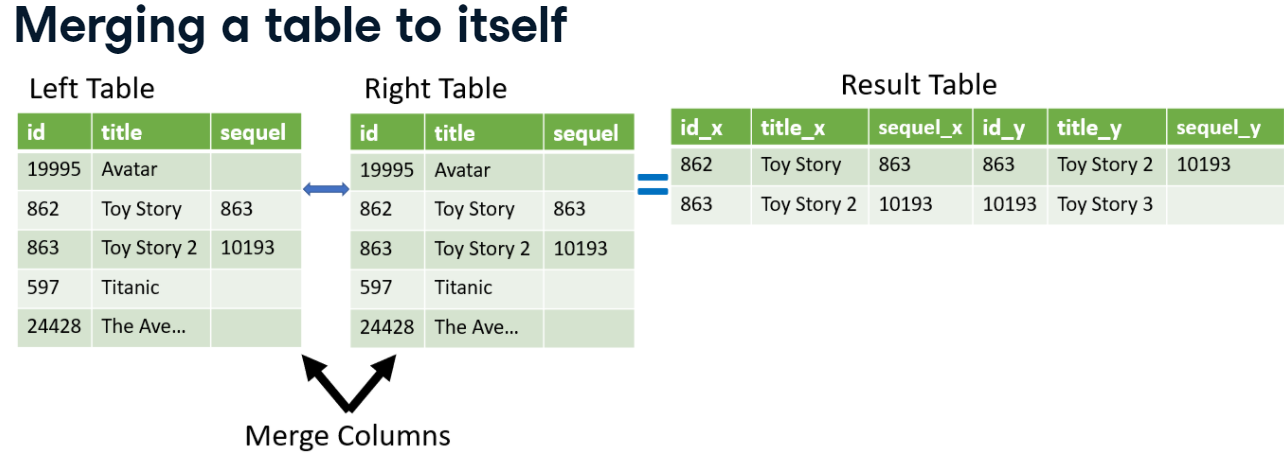



In [14]:
import pandas as pd
import numpy as np

sequels = pd.read_pickle("sequels.p")
sequels['sequel'].replace({pd.NA: None}, inplace=True)
display(sequels.head())
print("\n\nInner Self Join")

original_sequels = sequels.merge(sequels, left_on='sequel', right_on='id', suffixes=['_org','_seq'])
display(original_sequels.head())
print("\n")
display(original_sequels[['title_org','title_seq']].head())

print("\n\nLeft  Self Join")
original_sequels = sequels.merge(sequels, how="left", left_on='sequel', right_on='id', suffixes=['_org','_seq'])
display(original_sequels.head())
print("\n")
display(original_sequels[['title_org','title_seq']].head())

,id,title,sequel
0,19995,Avatar,None
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,None
4,24428,The Avengers,None




Inner Self Join


,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,862,Toy Story,863,863,Toy Story 2,10193
1,863,Toy Story 2,10193,10193,Toy Story 3,None
2,675,Harry Potter and the Order of the Phoenix,767,767,Harry Potter and the Half-Blood Prince,None
3,121,The Lord of the Rings: The Two Towers,122,122,The Lord of the Rings: The Return of the King,None
4,120,The Lord of the Rings: The Fellowship of the Ring,121,121,The Lord of the Rings: The Two Towers,122


,title_org,title_seq
0,Toy Story,Toy Story 2
1,Toy Story 2,Toy Story 3
2,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince
3,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
4,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers




Left  Self Join


,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,19995,Avatar,None,<NA>,NaN,NaN
1,862,Toy Story,863,863,Toy Story 2,10193
2,863,Toy Story 2,10193,10193,Toy Story 3,None
3,597,Titanic,None,<NA>,NaN,NaN
4,24428,The Avengers,None,<NA>,NaN,NaN


,title_org,title_seq
0,Avatar,NaN
1,Toy Story,Toy Story 2
2,Toy Story 2,Toy Story 3
3,Titanic,NaN
4,The Avengers,NaN


## **Self join**

Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called `crews`, which has columns `id`, `job`, and `name`. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

* To a variable called `crews_self_merged`, merge the `crews` table to itself on the `id` column using an inner join, setting the `suffixes` to `'_dir'` and `'_crew'` for the left and right tables respectively.
* Create a Boolean index, named `boolean_filter`, that selects rows from the left table with the job of `'Director'` and avoids rows with the job of `'Director'` in the right table.

In [21]:
import pandas as pd

crews = pd.read_pickle("crews.p").drop(columns="department")
print("crews")
print(crews.shape)
display(crews.head())

# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on="id", suffixes=["_dir", "_crew"])
print("\ncrews_self_merged")
print(crews_self_merged.shape)
display(crews_self_merged.head())

# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == "Director") & (crews_self_merged['job_crew'] != "Director"))
direct_crews = crews_self_merged[boolean_filter]
print("\n\ndirect_crews")
print(direct_crews.shape)
display(direct_crews.head())

crews
(42502, 3)


,id,job,name
0,19995,Editor,Stephen E. Rivkin
2,19995,Sound Designer,Christopher Boyes
4,19995,Casting,Mali Finn
6,19995,Director,James Cameron
7,19995,Writer,James Cameron



crews_self_merged
(834194, 5)


,id,job_dir,name_dir,job_crew,name_crew
0,19995,Editor,Stephen E. Rivkin,Editor,Stephen E. Rivkin
1,19995,Editor,Stephen E. Rivkin,Sound Designer,Christopher Boyes
2,19995,Editor,Stephen E. Rivkin,Casting,Mali Finn
3,19995,Editor,Stephen E. Rivkin,Director,James Cameron
4,19995,Editor,Stephen E. Rivkin,Writer,James Cameron




direct_crews
(40845, 5)


,id,job_dir,name_dir,job_crew,name_crew
156,19995,Director,James Cameron,Editor,Stephen E. Rivkin
157,19995,Director,James Cameron,Sound Designer,Christopher Boyes
158,19995,Director,James Cameron,Casting,Mali Finn
160,19995,Director,James Cameron,Writer,James Cameron
161,19995,Director,James Cameron,Set Designer,Richard F. Mays


# **Merge with Index**

In [38]:
import pandas as pd

movies = pd.read_pickle("movies.p").set_index("id")
taglines = pd.read_pickle("taglines.p").set_index("id")
print("movies table")
display(movies.head())
print("\ntaglines table")
display(taglines.head())

# ใช้ on ตามปกติ
movies_taglines = movies.merge(taglines, on='id', how='left')
print("\n\nmovies_taglines")
print(movies_taglines.shape)
display(movies_taglines.head())

movies table


,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17



taglines table


,tagline
id,
19995,Enter the World of Pandora.
285,"At the end of the world, the adventure begins."
206647,A Plan No One Escapes
49026,The Legend Ends
49529,"Lost in our world, found in another."




movies_taglines
(4803, 4)


,title,popularity,release_date,tagline
id,,,,
257,Oliver Twist,20.415572,2005-09-23,NaN
14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


# **MultiIndex Merge**

In [41]:
casts = pd.read_pickle("casts.p").set_index(["movie_id",	"cast_id"])

samuel = casts[casts["name"]=="Samuel L. Jackson"][["name"]]
casts = pd.read_pickle("casts.p").set_index(["movie_id",	"cast_id"])[["character"]]
print("casts table")
print(casts.shape)
display(casts.head())

print("Samuel table")
print(samuel.shape)
display(samuel[["name"]].head())

# MultiIndex Merge

samuel_casts = samuel.merge(casts, on=['movie_id','cast_id'])
print("\n\n\nsamuel_casts")
print(samuel_casts.shape)
display(samuel_casts.head())


casts table
(106257, 1)


character
movie_id cast_id          
5        22        Jezebel
         23          Diana
         24         Athena
         25        Elspeth
         26            Eva

Samuel table
(67, 1)


,,name
movie_id,cast_id,
184,3,Samuel L. Jackson
319,13,Samuel L. Jackson
326,2,Samuel L. Jackson
329,138,Samuel L. Jackson
393,21,Samuel L. Jackson





samuel_casts
(67, 2)


,,name,character
movie_id,cast_id,,
184,3,Samuel L. Jackson,Ordell Robbie
319,13,Samuel L. Jackson,Big Don
326,2,Samuel L. Jackson,Neville Flynn
329,138,Samuel L. Jackson,Arnold
393,21,Samuel L. Jackson,Rufus


# **Merge when index names differ**

In [44]:
movies = pd.read_pickle("movies.p").set_index("id")
movie_to_genres = pd.read_pickle("movie_to_genres.p").set_index("movie_id")
print("movies table")
display(movies.head())
print("\nmovie_to_genres")
display(movie_to_genres.head())

movies_genres = movies.merge(movie_to_genres, left_on='id', left_index=True, right_on='movie_id', right_index=True)
print("\n\n\nmovies_genres")
display(movies_genres.head())

movies table


,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17



movie_to_genres


,genre
movie_id,
5,Crime
5,Comedy
11,Science Fiction
11,Action
11,Adventure





movies_genres


,id,title,popularity,release_date,genre
5,5,Four Rooms,22.876230,1995-12-09,Crime
5,5,Four Rooms,22.876230,1995-12-09,Comedy
11,11,Star Wars,126.393695,1977-05-25,Science Fiction
11,11,Star Wars,126.393695,1977-05-25,Action
11,11,Star Wars,126.393695,1977-05-25,Adventure


## **Index merge for movie ratings**

To practice merging on indexes, you will merge `movies` and a table called `ratings` that holds info about movie ratings. Make sure your merge returns all of the rows from the `movies` table and not all the rows of `ratings` table need to be included in the result.

* Merge `movies` and `ratings` on the index and save to a variable called `movies_ratings`, ensuring that all of the rows from the `movies` table are returned.

In [46]:
movies = pd.read_pickle("movies.p").set_index("id")
ratings = pd.read_pickle("ratings.p").set_index("id")
print("movies table")
display(movies.head())
print("\nratings table")
display(ratings.head())

# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on="id", how="left")
# Print the first few rows of movies_ratings
print("\n\n\nmovies_ratings table")
display(movies_ratings.head())

movies table


,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17



ratings table


,vote_average,vote_count
id,,
19995,7.2,11800.0
285,6.9,4500.0
206647,6.3,4466.0
49026,7.6,9106.0
49529,6.1,2124.0





movies_ratings table


,title,popularity,release_date,vote_average,vote_count
id,,,,,
257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
9672,Infamous,3.680896,2006-11-16,6.4,60.0
12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


## **Do sequels earn more?**

It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the `sequels` and `financials` tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the `sequels` table and not all the rows of `financials` table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

* With the `sequels` table on the left, merge to it the `financials` table on index named `id`, ensuring that all the rows from the `sequels` are returned and some rows from the other table may not be returned, Save the results to `sequels_fin`.

* Merge the `sequels_fin` table to itself with an inner join, where the left and right tables merge on `sequel` and `id` respectively with `suffixes` equal to `['_org','_seq']`, saving to `orig_seq`.

* Select the `title_org`, `title_seq`, and `diff` columns of `orig_seq` and save this as `titles_diff`.
* Sort by `titles_diff` by `diff` in descending order and print the first few rows.

In [53]:
import pandas as pd
import numpy as np

sequels = pd.read_pickle("sequels.p").set_index("id")
sequels['sequel'].replace({pd.NA: None}, inplace=True)
print("Sequels Table")
display(sequels.head())
financials = pd.read_pickle("financials.p").set_index("id")
print("\nFinancials Table")
display(financials.head())

# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on="id", how="left")
print("\n\n\nsequels_fin table")
display(sequels_fin.head())

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how="inner", left_on="sequel", 
                             right_on="id", right_index=True,
                             suffixes=['_org','_seq'])

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

print("\n\norig_seq table")
display(orig_seq.head())

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[["title_org", "title_seq", "diff"]]
print("\n\ntitles_diff")
display(titles_diff.head())

# Print the first rows of the sorted titles_diff
print("\n\n\n")
display(titles_diff.sort_values(by="diff", ascending=False).head())

Sequels Table


,title,sequel
id,,
19995,Avatar,None
862,Toy Story,863
863,Toy Story 2,10193
597,Titanic,None
24428,The Avengers,None



Financials Table


,budget,revenue
id,,
19995,237000000,2.787965e+09
285,300000000,9.610000e+08
206647,245000000,8.806746e+08
49026,250000000,1.084939e+09
49529,260000000,2.841391e+08





sequels_fin table


,title,sequel,budget,revenue
id,,,,
19995,Avatar,None,237000000.0,2.787965e+09
862,Toy Story,863,30000000.0,3.735540e+08
863,Toy Story 2,10193,90000000.0,4.973669e+08
597,Titanic,None,200000000.0,1.845034e+09
24428,The Avengers,None,220000000.0,1.519558e+09




orig_seq table


,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq,diff
id,,,,,,,,,,
862,863,Toy Story,863,30000000.0,373554033.0,Toy Story 2,10193,90000000.0,4.973669e+08,123812836.0
863,10193,Toy Story 2,10193,90000000.0,497366869.0,Toy Story 3,None,200000000.0,1.066970e+09,569602834.0
675,767,Harry Potter and the Order of the Phoenix,767,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,None,250000000.0,9.339592e+08,-4253541.0
121,122,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,None,94000000.0,1.118889e+09,192601579.0
120,121,The Lord of the Rings: The Fellowship of the Ring,121,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122,79000000.0,9.262874e+08,54919036.0




titles_diff


,title_org,title_seq,diff
id,,,
862,Toy Story,Toy Story 2,123812836.0
863,Toy Story 2,Toy Story 3,569602834.0
675,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince,-4253541.0
121,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King,192601579.0
120,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,54919036.0


,title_org,title_seq,diff
id,,,
331,Jurassic Park III,Jurassic World,1.144748e+09
272,Batman Begins,The Dark Knight,6.303398e+08
10138,Iron Man 2,Iron Man 3,5.915067e+08
863,Toy Story 2,Toy Story 3,5.696028e+08
10764,Quantum of Solace,Skyfall,5.224703e+08


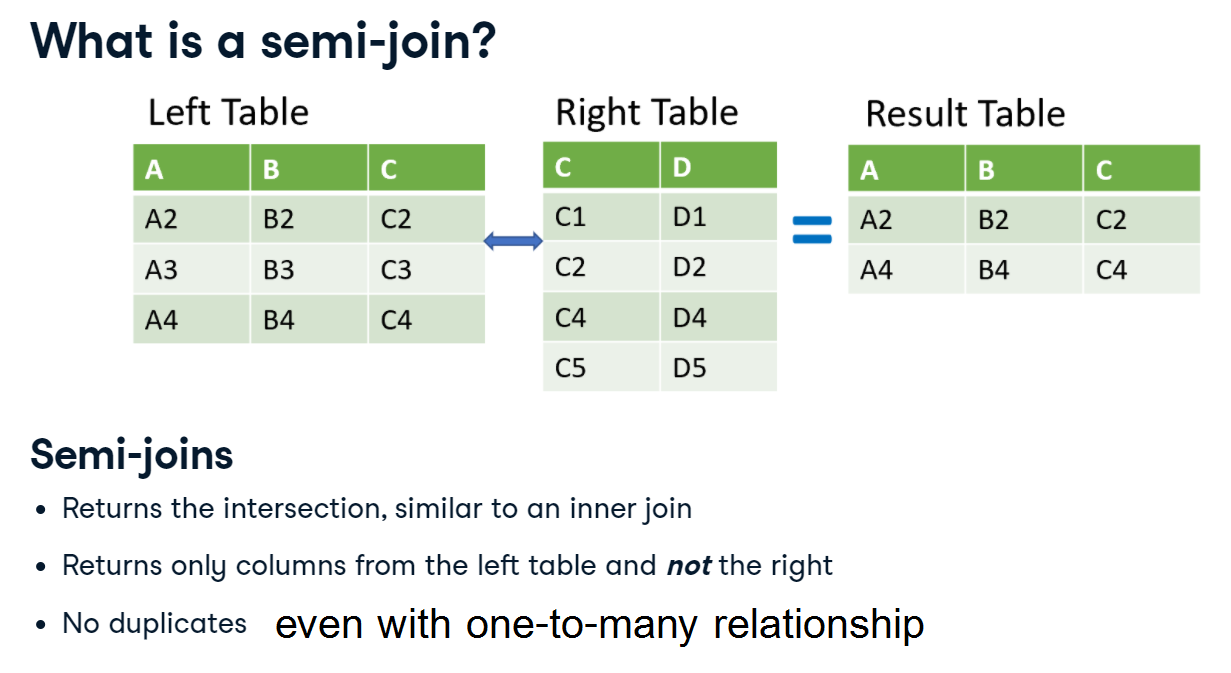

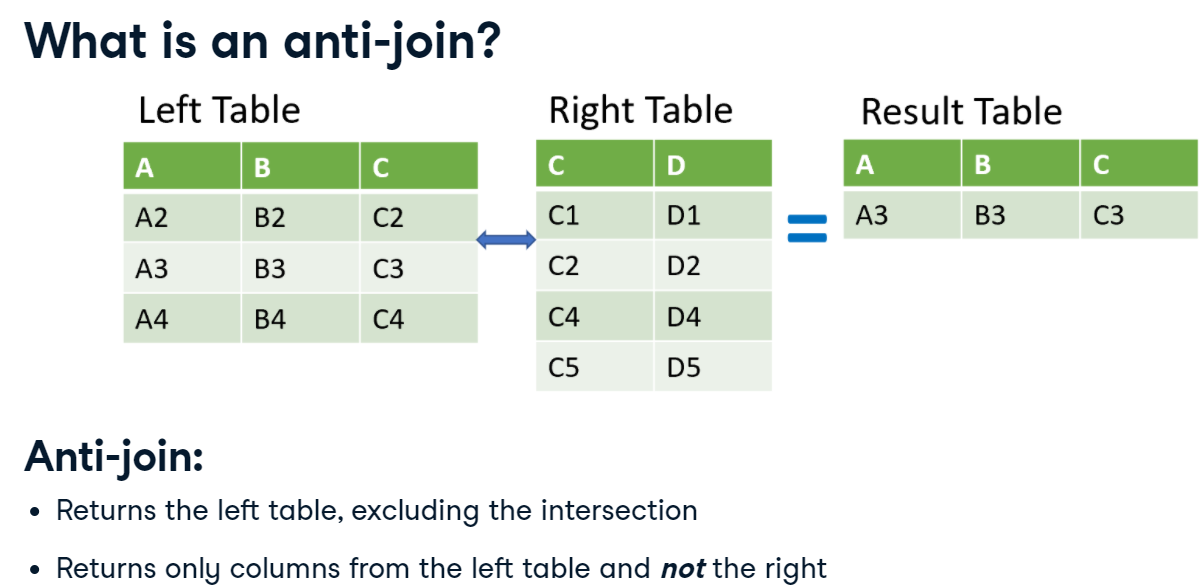

## **Performing an anti-join**

Each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti-join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

* Merge `employees` and `top_cust` with a left join, setting `indicator` argument to `True`. Save the result to `empl_cust`.

In [63]:
import pandas as pd
import numpy as np
from pandas import Timestamp

columns = ['cid', 'srid', 'fname', 'lname', 'phone', 'fax', 'email']
data = [[1, 3, 'Luís', 'Gonçalves', '+55 (12) 3923-5555',
        '+55 (12) 3923-5566', 'luisg@embraer.com.br'],
       [2, 5, 'Leonie', 'Köhler', '+49 0711 2842222', np.nan,
        'leonekohler@surfeu.de'],
       [3, 3, 'François', 'Tremblay', '+1 (514) 721-4711', np.nan,
        'ftremblay@gmail.com'],
       [4, 4, 'Bjørn', 'Hansen', '+47 22 44 22 22', np.nan,
        'bjorn.hansen@yahoo.no'],
       [5, 4, 'František', 'Wichterlová', '+420 2 4172 5555',
        '+420 2 4172 5555', 'frantisekw@jetbrains.com'],
       [6, 5, 'Helena', 'Holý', '+420 2 4177 0449', np.nan,
        'hholy@gmail.com'],
       [7, 5, 'Astrid', 'Gruber', '+43 01 5134505', np.nan,
        'astrid.gruber@apple.at'],
       [8, 4, 'Daan', 'Peeters', '+32 02 219 03 03', np.nan,
        'daan_peeters@apple.be'],
       [9, 4, 'Kara', 'Nielsen', '+453 3331 9991', np.nan,
        'kara.nielsen@jubii.dk'],
       [10, 4, 'Eduardo', 'Martins', '+55 (11) 3033-5446',
        '+55 (11) 3033-4564', 'eduardo@woodstock.com.br'],
       [11, 5, 'Alexandre', 'Rocha', '+55 (11) 3055-3278',
        '+55 (11) 3055-8131', 'alero@uol.com.br'],
       [12, 3, 'Roberto', 'Almeida', '+55 (21) 2271-7000',
        '+55 (21) 2271-7070', 'roberto.almeida@riotur.gov.br'],
       [13, 4, 'Fernp.nanda', 'Ramos', '+55 (61) 3363-5547',
        '+55 (61) 3363-7855', 'fernadaramos4@uol.com.br'],
       [14, 5, 'Mark', 'Philips', '+1 (780) 434-4554',
        '+1 (780) 434-5565', 'mphilips12@shaw.ca'],
       [15, 3, 'Jennifer', 'Peterson', '+1 (604) 688-2255',
        '+1 (604) 688-8756', 'jenniferp@rogers.ca'],
       [16, 4, 'Frank', 'Harris', '+1 (650) 253-0000',
        '+1 (650) 253-0000', 'fharris@google.com'],
       [17, 5, 'Jack', 'Smith', '+1 (425) 882-8080', '+1 (425) 882-8081',
        'jacksmith@microsoft.com'],
       [18, 3, 'Michelle', 'Brooks', '+1 (212) 221-3546',
        '+1 (212) 221-4679', 'michelleb@aol.com'],
       [19, 3, 'Tim', 'Goyer', '+1 (408) 996-1010', '+1 (408) 996-1011',
        'tgoyer@apple.com'],
       [20, 4, 'Dan', 'Miller', '+1 (650) 644-3358', np.nan,
        'dmiller@comcast.com'],
       [21, 5, 'Kathy', 'Chase', '+1 (775) 223-7665', np.nan,
        'kachase@hotmail.com'],
       [22, 4, 'Heather', 'Leacock', '+1 (407) 999-7788', np.nan,
        'hleacock@gmail.com'],
       [23, 4, 'John', 'Gordon', '+1 (617) 522-1333', np.nan,
        'johngordon22@yahoo.com'],
       [24, 3, 'Frank', 'Ralston', '+1 (312) 332-3232', np.nan,
        'fralston@gmail.com'],
       [25, 5, 'Victor', 'Stevens', '+1 (608) 257-0597', np.nan,
        'vstevens@yahoo.com'],
       [26, 4, 'Richard', 'Cunningham', '+1 (817) 924-7272', np.nan,
        'ricunningham@hotmail.com'],
       [27, 4, 'Patrick', 'Gray', '+1 (520) 622-4200', np.nan,
        'patrick.gray@aol.com'],
       [28, 5, 'Julia', 'Barnett', '+1 (801) 531-7272', np.nan,
        'jubarnett@gmail.com'],
       [29, 3, 'Robert', 'Brown', '+1 (416) 363-8888', np.nan,
        'robbrown@shaw.ca'],
       [30, 3, 'Edward', 'Francis', '+1 (613) 234-3322', np.nan,
        'edfrancis@yachoo.ca'],
       [31, 5, 'Martha', 'Silk', '+1 (902) 450-0450', np.nan,
        'marthasilk@gmail.com'],
       [32, 4, 'Aaron', 'Mitchell', '+1 (204) 452-6452', np.nan,
        'aaronmitchell@yahoo.ca'],
       [33, 3, 'Ellie', 'Sullivan', '+1 (867) 920-2233', np.nan,
        'ellie.sullivan@shaw.ca'],
       [34, 4, 'João', 'Fernp.nandes', '+351 (213) 466-111', np.nan,
        'jfernp.nandes@yahoo.pt'],
       [35, 4, 'Madalena', 'Sampaio', '+351 (225) 022-448', np.nan,
        'masampaio@sapo.pt'],
       [36, 5, 'Hannah', 'Schneider', '+49 030 26550280', np.nan,
        'hannah.schneider@yahoo.de'],
       [37, 3, 'Fynn', 'Zimmermann', '+49 069 40598889', np.nan,
        'fzimmermann@yahoo.de'],
       [38, 3, 'Niklas', 'Schröder', '+49 030 2141444', np.nan,
        'nschroder@surfeu.de'],
       [39, 4, 'Camille', 'Bernard', '+33 01 49 70 65 65', np.nan,
        'camille.bernard@yahoo.fr'],
       [40, 4, 'Dominique', 'Lefebvre', '+33 01 47 42 71 71', np.nan,
        'dominiquelefebvre@gmail.com'],
       [41, 5, 'Marc', 'Dubois', '+33 04 78 30 30 30', np.nan,
        'marc.dubois@hotmail.com'],
       [42, 3, 'Wyatt', 'Girard', '+33 05 56 96 96 96', np.nan,
        'wyatt.girard@yahoo.fr'],
       [43, 3, 'Isabelle', 'Mercier', '+33 03 80 73 66 99', np.nan,
        'isabelle_mercier@apple.fr'],
       [44, 3, 'Terhi', 'Hämäläinen', '+358 09 870 2000', np.nan,
        'terhi.hamalainen@apple.fi'],
       [45, 3, 'Ladislav', 'Kovács', np.nan, np.nan,
        'ladislav_kovacs@apple.hu'],
       [46, 3, 'Hugh', "O'Reilly", '+353 01 6792424', np.nan,
        'hughoreilly@apple.ie'],
       [47, 5, 'Lucas', 'Mancini', '+39 06 39733434', np.nan,
        'lucas.mancini@yahoo.it'],
       [48, 5, 'Johannes', 'Van der Berg', '+31 020 6223130', np.nan,
        'johavanderberg@yahoo.nl'],
       [49, 4, 'Stanisław', 'Wójcik', '+48 22 828 37 39', np.nan,
        'stanisław.wójcik@wp.pl'],
       [50, 5, 'Enrique', 'Muñoz', '+34 914 454 454', np.nan,
        'enrique_munoz@yahoo.es'],
       [51, 5, 'Joakim', 'Johansson', '+46 08-651 52 52', np.nan,
        'joakim.johansson@yahoo.se'],
       [52, 3, 'Emma', 'Jones', '+44 020 7707 0707', np.nan,
        'emma_jones@hotmail.com'],
       [53, 3, 'Phil', 'Hughes', '+44 020 7976 5722', np.nan,
        'phil.hughes@gmail.com'],
       [54, 5, 'Steve', 'Murray', '+44 0131 315 3300', np.nan,
        'steve.murray@yahoo.uk'],
       [55, 4, 'Mark', 'Taylor', '+61 (02) 9332 3633', np.nan,
        'mark.taylor@yahoo.au'],
       [56, 4, 'Diego', 'Gutiérrez', '+54 (0)11 4311 4333', np.nan,
        'diego.gutierrez@yahoo.ar'],
       [57, 5, 'Luis', 'Rojas', '+56 (0)2 635 4444', np.nan,
        'luisrojas@yahoo.cl'],
       [58, 3, 'Manoj', 'Pareek', '+91 0124 39883988', np.nan,
        'manoj.pareek@rediff.com'],
       [59, 3, 'Puja', 'Srivastava', '+91 080 22289999', np.nan,
        'puja_srivastava@yahoo.in']]
top_cust = pd.DataFrame(columns=columns, data=data)

columns = ['srid', 'lname', 'fname', 'title', 'hire_date', 'email']
data = [[1, 'Adams', 'Andrew', 'General Manager',
        Timestamp('2002-08-14 00:00:00'), 'andrew@chinookcorp.com'],
       [2, 'Edwards', 'Nancy', 'Sales Manager',
        Timestamp('2002-05-01 00:00:00'), 'nancy@chinookcorp.com'],
       [3, 'Peacock', 'Jane', 'Sales Support Agent',
        Timestamp('2002-04-01 00:00:00'), 'jane@chinookcorp.com'],
       [4, 'Park', 'Margaret', 'Sales Support Agent',
        Timestamp('2003-05-03 00:00:00'), 'margaret@chinookcorp.com'],
       [5, 'Johnson', 'Steve', 'Sales Support Agent',
        Timestamp('2003-10-17 00:00:00'), 'steve@chinookcorp.com'],
       [6, 'Mitchell', 'Michael', 'IT Manager',
        Timestamp('2003-10-17 00:00:00'), 'michael@chinookcorp.com'],
       [7, 'King', 'Robert', 'IT Staff',
        Timestamp('2004-01-02 00:00:00'), 'robert@chinookcorp.com'],
       [8, 'Callahan', 'Laura', 'IT Staff',
        Timestamp('2004-03-04 00:00:00'), 'laura@chinookcorp.com']]
employees = pd.DataFrame(data=data, columns=columns)

print("employees table")
display(employees.head())
print("\ntop_cust table")
display(top_cust.head())

# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)
print("\n\nempl_cust table")
display(empl_cust.head())

employees table


,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2003-05-03,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2003-10-17,steve@chinookcorp.com



top_cust table


,cid,srid,fname,lname,phone,fax,email
0,1,3,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,2,5,Leonie,Köhler,+49 0711 2842222,NaN,leonekohler@surfeu.de
2,3,3,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
3,4,4,Bjørn,Hansen,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no
4,5,4,František,Wichterlová,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com




empl_cust table


,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both


* Select the `srid` column of `empl_cust` and the rows where `_merge` is `'left_only'`. Save the result to `srid_list`.
* Subset the `employees` table and select those rows where the `srid` is in the variable `srid_list` and print the results.

In [64]:
# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
display(employees[employees["srid"].isin(srid_list)])

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04,laura@chinookcorp.com


You performed an anti-join by 

1. merging the tables with a left join
2. selecting the ID of those employees who did not support a top customer
3. subsetting the original employee's table. 

From that, we can see that there are five employees not supporting top customers. Anti-joins are a powerful tool to filter a main table (i.e. employees) by another (i.e. customers).

## **Performing a semi-join**

You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi-join to find the top revenue-generating non-musical tracks..

* Merge `non_mus_tcks` and `top_invoices` on `tid` using an inner join. Save the result as `tracks_invoices`.
* Use `.isin()` to subset the rows of `non_mus_tck` where `tid` is in the `tid` column of `tracks_invoices`. Save the result as `top_tracks`.
* Group `top_tracks` by `gid` and count the `tid` rows. Save the result to `cnt_by_gid`.
* Merge `cnt_by_gid` with the `genres` table on `gid` and print the result.

In [15]:
import pandas as pd

data = [[2820, 'Occupation / Precipice', 227, 3, 19, 1.99],
       [2821, 'Exodus, Pt. 1', 227, 3, 19, 1.99],
       [2822, 'Exodus, Pt. 2', 227, 3, 19, 1.99],
       [2823, 'Collaborators', 227, 3, 19, 1.99],
       [2824, 'Torn', 227, 3, 19, 1.99],
       [2837, 'Crossroads, Pt. 1', 227, 3, 20, 1.99],
       [2838, 'Crossroads, Pt. 2', 227, 3, 20, 1.99],
       [2839, 'Genesis', 228, 3, 19, 1.99],
       [2840, "Don't Look Back", 228, 3, 21, 1.99],
       [2841, 'One Giant Leap', 228, 3, 21, 1.99],
       [2842, 'Collision', 228, 3, 21, 1.99],
       [2843, 'Hiros', 228, 3, 21, 1.99],
       [2844, 'Better Halves', 228, 3, 21, 1.99],
       [2845, 'Nothing to Hide', 228, 3, 19, 1.99],
       [2846, 'Seven Minutes to Midnight', 228, 3, 21, 1.99],
       [2847, 'Homecoming', 228, 3, 21, 1.99],
       [2848, 'Six Months Ago', 228, 3, 19, 1.99],
       [2849, 'Fallout', 228, 3, 21, 1.99],
       [2850, 'The Fix', 228, 3, 21, 1.99],
       [2851, 'Distractions', 228, 3, 21, 1.99],
       [2852, 'Run!', 228, 3, 21, 1.99],
       [2853, 'Unexpected', 228, 3, 21, 1.99],
       [2854, 'Company Man', 228, 3, 21, 1.99],
       [2855, 'Company Man', 228, 3, 21, 1.99],
       [2856, 'Parasite', 228, 3, 21, 1.99],
       [2857, 'A Tale of Two Cities', 229, 3, 19, 1.99],
       [2858, 'Lost (Pilot, Part 1) [Premiere]', 230, 3, 19, 1.99],
       [2859, 'Man of Science, Man of Faith (Premiere)', 231, 3, 19,
        1.99],
       [2860, 'Adrift', 231, 3, 19, 1.99],
       [2861, 'Lost (Pilot, Part 2)', 230, 3, 19, 1.99],
       [2862, 'The Glass Ballerina', 229, 3, 21, 1.99],
       [2863, 'Further Instructions', 229, 3, 19, 1.99],
       [2864, 'Orientation', 231, 3, 19, 1.99],
       [2865, 'Tabula Rasa', 230, 3, 19, 1.99],
       [2866, 'Every Man for Himself', 229, 3, 21, 1.99],
       [2867, 'Everybody Hates Hugo', 231, 3, 19, 1.99],
       [2868, 'Walkabout', 230, 3, 19, 1.99],
       [2869, '...And Found', 231, 3, 19, 1.99],
       [2870, 'The Cost of Living', 229, 3, 19, 1.99],
       [2871, 'White Rabbit', 230, 3, 19, 1.99],
       [2872, 'Abandoned', 231, 3, 19, 1.99],
       [2873, 'House of the Rising Sun', 230, 3, 19, 1.99],
       [2874, 'I Do', 229, 3, 19, 1.99],
       [2875, 'Not In Portland', 229, 3, 21, 1.99],
       [2876, 'Not In Portland', 229, 3, 21, 1.99],
       [2877, 'The Moth', 230, 3, 19, 1.99],
       [2878, 'The Other 48 Days', 231, 3, 19, 1.99],
       [2879, 'Collision', 231, 3, 19, 1.99],
       [2880, 'Confidence Man', 230, 3, 19, 1.99],
       [2881, 'Flashes Before Your Eyes', 229, 3, 21, 1.99],
       [2882, 'Lost Survival Guide', 229, 3, 21, 1.99],
       [2883, 'Solitary', 230, 3, 19, 1.99],
       [2884, 'What Kate Did', 231, 3, 19, 1.99],
       [2885, 'Raised By Another', 230, 3, 19, 1.99],
       [2886, 'Stranger In a Strange Land', 229, 3, 21, 1.99],
       [2887, 'The 23rd Psalm', 231, 3, 19, 1.99],
       [2888, 'All the Best Cowboys Have Daddy Issues', 230, 3, 19, 1.99],
       [2889, 'The Hunting Party', 231, 3, 21, 1.99],
       [2890, 'Tricia Tanaka Is Dead', 229, 3, 21, 1.99],
       [2891, 'Enter 77', 229, 3, 21, 1.99],
       [2892, 'Fire + Water', 231, 3, 21, 1.99],
       [2893, 'Whatever the Case May Be', 230, 3, 19, 1.99],
       [2894, 'Hearts and Minds', 230, 3, 19, 1.99],
       [2895, 'Par Avion', 229, 3, 21, 1.99],
       [2896, 'The Long Con', 231, 3, 19, 1.99],
       [2897, 'One of Them', 231, 3, 21, 1.99],
       [2898, 'Special', 230, 3, 19, 1.99],
       [2899, 'The Man from Tallahassee', 229, 3, 21, 1.99],
       [2900, 'Exposé', 229, 3, 21, 1.99],
       [2901, 'Homecoming', 230, 3, 19, 1.99],
       [2902, 'Maternity Leave', 231, 3, 21, 1.99],
       [2903, 'Left Behind', 229, 3, 21, 1.99],
       [2904, 'Outlaws', 230, 3, 19, 1.99],
       [2905, 'The Whole Truth', 231, 3, 21, 1.99],
       [2906, '...In Translation', 230, 3, 19, 1.99],
       [2907, 'Lockdown', 231, 3, 21, 1.99],
       [2908, 'One of Us', 229, 3, 21, 1.99],
       [2909, 'Catch-22', 229, 3, 21, 1.99],
       [2910, 'Dave', 231, 3, 19, 1.99],
       [2911, 'Numbers', 230, 3, 19, 1.99],
       [2912, 'D.O.C.', 229, 3, 21, 1.99],
       [2913, 'Deus Ex Machina', 230, 3, 19, 1.99],
       [2914, 'S.O.S.', 231, 3, 19, 1.99],
       [2915, 'Do No Harm', 230, 3, 19, 1.99],
       [2916, 'Two for the Road', 231, 3, 21, 1.99],
       [2917, 'The Greater Good', 230, 3, 19, 1.99],
       [2918, '"?"', 231, 3, 19, 1.99],
       [2919, 'Born to Run', 230, 3, 19, 1.99],
       [2920, 'Three Minutes', 231, 3, 19, 1.99],
       [2921, 'Exodus (Part 1)', 230, 3, 19, 1.99],
       [2922, 'Live Together, Die Alone, Pt. 1', 231, 3, 21, 1.99],
       [2923, 'Exodus (Part 2) [Season Finale]', 230, 3, 19, 1.99],
       [2924, 'Live Together, Die Alone, Pt. 2', 231, 3, 19, 1.99],
       [2925, 'Exodus (Part 3) [Season Finale]', 230, 3, 19, 1.99],
       [3165, 'The Brig', 229, 3, 21, 1.99],
       [3166, '.07%', 228, 3, 21, 1.99],
       [3167, 'Five Years Gone', 228, 3, 21, 1.99],
       [3168, 'The Hard Part', 228, 3, 21, 1.99],
       [3169, 'The Man Behind the Curtain', 229, 3, 21, 1.99],
       [3170, 'Greatest Hits', 229, 3, 21, 1.99],
       [3171, 'Landslide', 228, 3, 21, 1.99],
       [3172, 'The Office: An American Workplace (Pilot)', 249, 3, 19,
        1.99],
       [3173, 'Diversity Day', 249, 3, 19, 1.99],
       [3174, 'Health Care', 249, 3, 19, 1.99],
       [3175, 'The Alliance', 249, 3, 19, 1.99],
       [3176, 'Basketball', 249, 3, 19, 1.99],
       [3177, 'Hot Girl', 249, 3, 19, 1.99],
       [3178, 'The Dundies', 250, 3, 19, 1.99],
       [3179, 'Sexual Harassment', 250, 3, 19, 1.99],
       [3180, 'Office Olympics', 250, 3, 19, 1.99],
       [3181, 'The Fire', 250, 3, 19, 1.99],
       [3182, 'Halloween', 250, 3, 19, 1.99],
       [3183, 'The Fight', 250, 3, 19, 1.99],
       [3184, 'The Client', 250, 3, 19, 1.99],
       [3185, 'Performance Review', 250, 3, 19, 1.99],
       [3186, 'Email Surveillance', 250, 3, 19, 1.99],
       [3187, 'Christmas Party', 250, 3, 19, 1.99],
       [3188, 'Booze Cruise', 250, 3, 19, 1.99],
       [3189, 'The Injury', 250, 3, 19, 1.99],
       [3190, 'The Secret', 250, 3, 19, 1.99],
       [3191, 'The Carpet', 250, 3, 19, 1.99],
       [3192, 'Boys and Girls', 250, 3, 19, 1.99],
       [3193, "Valentine's Day", 250, 3, 19, 1.99],
       [3194, "Dwight's Speech", 250, 3, 19, 1.99],
       [3195, 'Take Your Daughter to Work Day', 250, 3, 19, 1.99],
       [3196, "Michael's Birthday", 250, 3, 19, 1.99],
       [3197, 'Drug Testing', 250, 3, 19, 1.99],
       [3198, 'Conflict Resolution', 250, 3, 19, 1.99],
       [3199, 'Casino Night - Season Finale', 250, 3, 19, 1.99],
       [3200, 'Gay Witch Hunt', 251, 3, 19, 1.99],
       [3201, 'The Convention', 251, 3, 19, 1.99],
       [3202, 'The Coup', 251, 3, 19, 1.99],
       [3203, 'Grief Counseling', 251, 3, 19, 1.99],
       [3204, 'The Initiation', 251, 3, 19, 1.99],
       [3205, 'Diwali', 251, 3, 19, 1.99],
       [3206, 'Branch Closing', 251, 3, 19, 1.99],
       [3207, 'The Merger', 251, 3, 19, 1.99],
       [3208, 'The Convict', 251, 3, 22, 1.99],
       [3209, 'A Benihana Christmas, Pts. 1 & 2', 251, 3, 22, 1.99],
       [3210, 'Back from Vacation', 251, 3, 22, 1.99],
       [3211, 'Traveling Salesmen', 251, 3, 22, 1.99],
       [3212, "Producer's Cut: The Return", 251, 3, 22, 1.99],
       [3213, 'Ben Franklin', 251, 3, 22, 1.99],
       [3214, "Phyllis's Wedding", 251, 3, 22, 1.99],
       [3215, 'Business School', 251, 3, 22, 1.99],
       [3216, 'Cocktails', 251, 3, 22, 1.99],
       [3217, 'The Negotiation', 251, 3, 22, 1.99],
       [3218, 'Safety Training', 251, 3, 22, 1.99],
       [3219, 'Product Recall', 251, 3, 22, 1.99],
       [3220, "Women's Appreciation", 251, 3, 22, 1.99],
       [3221, 'Beach Games', 251, 3, 22, 1.99],
       [3222, 'The Job', 251, 3, 22, 1.99],
       [3223, 'How to Stop an Exploding Man', 228, 3, 21, 1.99],
       [3224, 'Through a Looking Glass', 229, 3, 21, 1.99],
       [3226, 'Battlestar Galactica, Pt. 1', 253, 3, 20, 1.99],
       [3227, 'Battlestar Galactica, Pt. 2', 253, 3, 20, 1.99],
       [3228, 'Battlestar Galactica, Pt. 3', 253, 3, 20, 1.99],
       [3229, 'Lost Planet of the Gods, Pt. 1', 253, 3, 20, 1.99],
       [3230, 'Lost Planet of the Gods, Pt. 2', 253, 3, 20, 1.99],
       [3231, 'The Lost Warrior', 253, 3, 20, 1.99],
       [3232, 'The Long Patrol', 253, 3, 20, 1.99],
       [3233, 'The Gun On Ice Planet Zero, Pt. 1', 253, 3, 20, 1.99],
       [3234, 'The Gun On Ice Planet Zero, Pt. 2', 253, 3, 20, 1.99],
       [3235, 'The Magnificent Warriors', 253, 3, 20, 1.99],
       [3236, 'The Young Lords', 253, 3, 20, 1.99],
       [3237, 'The Living Legend, Pt. 1', 253, 3, 20, 1.99],
       [3238, 'The Living Legend, Pt. 2', 253, 3, 20, 1.99],
       [3239, 'Fire In Space', 253, 3, 20, 1.99],
       [3240, 'War of the Gods, Pt. 1', 253, 3, 20, 1.99],
       [3241, 'War of the Gods, Pt. 2', 253, 3, 20, 1.99],
       [3242, 'The Man With Nine Lives', 253, 3, 20, 1.99],
       [3243, 'Murder On the Rising Star', 253, 3, 20, 1.99],
       [3244, 'Greetings from Earth, Pt. 1', 253, 3, 20, 1.99],
       [3245, 'Greetings from Earth, Pt. 2', 253, 3, 20, 1.99],
       [3246, "Baltar's Escape", 253, 3, 20, 1.99],
       [3247, 'Experiment In Terra', 253, 3, 20, 1.99],
       [3248, 'Take the Celestra', 253, 3, 20, 1.99],
       [3249, 'The Hand of God', 253, 3, 20, 1.99],
       [3250, 'Pilot', 254, 3, 19, 1.99],
       [3251, 'Through the Looking Glass, Pt. 2', 229, 3, 21, 1.99],
       [3252, 'Through the Looking Glass, Pt. 1', 229, 3, 21, 1.99],
       [3337, 'Past, Present, and Future', 261, 3, 21, 1.99],
       [3338, 'The Beginning of the End', 261, 3, 21, 1.99],
       [3339, 'LOST Season 4 Trailer', 261, 3, 21, 1.99],
       [3340, 'LOST In 8:15', 261, 3, 21, 1.99],
       [3341, 'Confirmed Dead', 261, 3, 21, 1.99],
       [3342, 'The Economist', 261, 3, 21, 1.99],
       [3343, 'Eggtown', 261, 3, 19, 1.99],
       [3344, 'The Constant', 261, 3, 21, 1.99],
       [3345, 'The Other Woman', 261, 3, 21, 1.99],
       [3346, 'Ji Yeon', 261, 3, 19, 1.99],
       [3347, 'Meet Kevin Johnson', 261, 3, 19, 1.99],
       [3348, 'The Shape of Things to Come', 261, 3, 21, 1.99],
       [3360, 'Something Nice Back Home', 261, 3, 21, 1.99],
       [3361, 'Cabin Fever', 261, 3, 21, 1.99],
       [3362, "There's No Place Like Home, Pt. 1", 261, 3, 21, 1.99],
       [3363, "There's No Place Like Home, Pt. 2", 261, 3, 21, 1.99],
       [3364, "There's No Place Like Home, Pt. 3", 261, 3, 21, 1.99],
       [3428, 'Branch Closing', 251, 3, 22, 1.99],
       [3429, 'The Return', 251, 3, 22, 1.99]]

columns = ['tid', 'name', 'aid', 'mtid', 'gid', 'u_price']
non_mus_tcks = pd.DataFrame(data=data, columns=columns)

columns = ['ilid', 'iid', 'tid', 'uprice', 'quantity']
data = [[4.700e+02, 8.800e+01, 2.832e+03, 1.990e+00, 1.000e+00],
       [4.730e+02, 8.800e+01, 2.850e+03, 1.990e+00, 1.000e+00],
       [4.760e+02, 8.800e+01, 2.868e+03, 1.990e+00, 1.000e+00],
       [5.270e+02, 9.600e+01, 3.214e+03, 1.990e+00, 1.000e+00],
       [5.280e+02, 9.600e+01, 3.223e+03, 1.990e+00, 1.000e+00],
       [5.330e+02, 9.900e+01, 3.250e+03, 1.990e+00, 1.000e+00],
       [1.098e+03, 2.010e+02, 3.200e+03, 1.990e+00, 1.000e+00],
       [1.100e+03, 2.020e+02, 3.223e+03, 1.990e+00, 1.000e+00],
       [1.668e+03, 3.060e+02, 3.177e+03, 1.990e+00, 1.000e+00],
       [1.670e+03, 3.070e+02, 3.200e+03, 1.990e+00, 1.000e+00],
       [1.678e+03, 3.100e+02, 3.214e+03, 1.990e+00, 1.000e+00],
       [1.686e+03, 3.120e+02, 3.250e+03, 1.990e+00, 1.000e+00],
       [2.190e+03, 4.040e+02, 2.832e+03, 1.990e+00, 1.000e+00],
       [2.192e+03, 4.040e+02, 2.850e+03, 1.990e+00, 1.000e+00],
       [2.194e+03, 4.040e+02, 2.868e+03, 1.990e+00, 1.000e+00],
       [2.240e+03, 4.120e+02, 3.177e+03, 1.990e+00, 1.000e+00]]
top_invoices = pd.DataFrame(columns=columns, data=data)
for i in ['ilid', 'iid', 'tid']:
    top_invoices[i] = top_invoices[i].astype(int)

columns = ['gid', 'name']
data = [[1, 'Rock'],
       [2, 'Jazz'],
       [3, 'Metal'],
       [4, 'Alternative & Punk'],
       [5, 'Rock And Roll'],
       [6, 'Blues'],
       [7, 'Latin'],
       [8, 'Reggae'],
       [9, 'Pop'],
       [10, 'Soundtrack'],
       [11, 'Bossa Nova'],
       [12, 'Easy Listening'],
       [13, 'Heavy Metal'],
       [14, 'R&B/Soul'],
       [15, 'Electronica/Dance'],
       [16, 'World'],
       [17, 'Hip Hop/Rap'],
       [18, 'Science Fiction'],
       [19, 'TV Shows'],
       [20, 'Sci Fi & Fantasy'],
       [21, 'Drama'],
       [22, 'Comedy'],
       [23, 'Alternative'],
       [24, 'Classical'],
       [25, 'Opera']]
genres = pd.DataFrame(data=data, columns=columns)

print("non_mus_tcks")
print(non_mus_tcks.shape)
display(non_mus_tcks.head())
print("\ntop_invoices")
print(top_invoices.shape)
display(top_invoices.head())
print("\ngenres")
print(genres.shape)
display(genres.head())

# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on="tid")
print("----------------------------------------------------------------------")
print("tracks_invoices table")
print(tracks_invoices.shape)
display(tracks_invoices.head())

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices["tid"])]
print("\n\ntop_tracks")
print(top_tracks.shape)
display(top_tracks.head())

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby('gid', as_index=False).agg({'tid':"count"})
print("\n\ncnt_by_gid")
print(cnt_by_gid.shape)
display(cnt_by_gid)

# Merge the genres table to cnt_by_gid on gid and print
print("\n\ncnt_by_gid.merge(genres, on='gid')")
display(cnt_by_gid.merge(genres, on="gid"))

non_mus_tcks
(200, 6)


,tid,name,aid,mtid,gid,u_price
0,2820,Occupation / Precipice,227,3,19,1.99
1,2821,"Exodus, Pt. 1",227,3,19,1.99
2,2822,"Exodus, Pt. 2",227,3,19,1.99
3,2823,Collaborators,227,3,19,1.99
4,2824,Torn,227,3,19,1.99



top_invoices
(16, 5)


,ilid,iid,tid,uprice,quantity
0,470,88,2832,1.99,1.0
1,473,88,2850,1.99,1.0
2,476,88,2868,1.99,1.0
3,527,96,3214,1.99,1.0
4,528,96,3223,1.99,1.0



genres
(25, 2)


,gid,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


----------------------------------------------------------------------
tracks_invoices table
(14, 10)


,tid,name,aid,mtid,gid,u_price,ilid,iid,uprice,quantity
0,2850,The Fix,228,3,21,1.99,473,88,1.99,1.0
1,2850,The Fix,228,3,21,1.99,2192,404,1.99,1.0
2,2868,Walkabout,230,3,19,1.99,476,88,1.99,1.0
3,2868,Walkabout,230,3,19,1.99,2194,404,1.99,1.0
4,3177,Hot Girl,249,3,19,1.99,1668,306,1.99,1.0




top_tracks
(7, 6)


,tid,name,aid,mtid,gid,u_price
18,2850,The Fix,228,3,21,1.99
36,2868,Walkabout,230,3,19,1.99
106,3177,Hot Girl,249,3,19,1.99
129,3200,Gay Witch Hunt,251,3,19,1.99
143,3214,Phyllis's Wedding,251,3,22,1.99




cnt_by_gid
(3, 2)


,gid,tid
0,19,4
1,21,2
2,22,1




cnt_by_gid.merge(genres, on='gid')


,gid,tid,name
0,19,4,TV Shows
1,21,2,Drama
2,22,1,Comedy


Aside: Note that `.groupby("colname", as_index=False)` moves `"colname"` to columns.  Without `as_index=False`, we would have

In [20]:
print("top_tracks.groupby('gid', as_index=False).agg({'tid':'count'})")
display(top_tracks.groupby('gid', as_index=False).agg({'tid':"count"}))
print("\ntop_tracks.groupby('gid').agg({'tid':'count'})")
display(top_tracks.groupby('gid').agg({'tid':'count'}))

top_tracks.groupby('gid', as_index=False).agg({'tid':'count'})


,gid,tid
0,19,4
1,21,2
2,22,1



top_tracks.groupby('gid').agg({'tid':'count'})


,tid
gid,
19,4
21,2
22,1


# **Vertical Concatenation**

You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the `pd.concat()` by concatenating the tables vertically together in different ways.

* Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, in that order, setting `sort` to `True`.
* Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, where the index goes from `0` to `n-1`.
* Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, showing only columns that are in all tables.

In [27]:
columns = ['tid', 'name', 'aid', 'mtid', 'gid', 'composer', 'u_price']
data = [[1853, 'Battery', 152, 1, 3, 'J.Hetfield/L.Ulrich', 0.99],
       [1854, 'Master Of Puppets', 152, 1, 3, 'K.Hammett', 0.99],
       [1857, 'Disposable Heroes', 152, 1, 3, 'J.Hetfield/L.Ulrich', 0.99]]

tracks_master = pd.DataFrame(columns=columns, data=data)

columns = ['tid', 'name', 'aid', 'mtid', 'gid', 'u_price']
data = [[1874, 'Fight Fire With Fire', 154, 1, 3, 0.99],
       [1875, 'Ride The Lightning', 154, 1, 3, 0.99],
       [1876, 'For Whom The Bell Tolls', 154, 1, 3, 0.99],
       [1877, 'Fade To Black', 154, 1, 3, 0.99],
       [1878, 'Trapped Under Ice', 154, 1, 3, 0.99]]

tracks_ride = pd.DataFrame(columns=columns, data=data)

columns = ['tid', 'name', 'aid', 'mtid', 'gid', 'u_price']
data = [[1882, 'Frantic', 155, 1, 3, 0.99],
       [1883, 'St. Anger', 155, 1, 3, 0.99],
       [1884, 'Some Kind Of Monster', 155, 1, 3, 0.99],
       [1885, 'Dirty Window', 155, 1, 3, 0.99],
       [1886, 'Invisible Kid', 155, 1, 3, 0.99]]

tracks_st = pd.DataFrame(columns=columns, data=data)

for i in [tracks_master, tracks_ride, tracks_st]:
    display(i)

# Concatenate the tracks
print("\n\n\npd.concat([tracks_master, tracks_ride, tracks_st], sort=True)")
display(pd.concat([tracks_master, tracks_ride, tracks_st], sort=True))

# Concatenate the tracks so the index goes from 0 to n-1
print("\n\n\npd.concat([tracks_master, tracks_ride, tracks_st], ignore_index=True, sort=True)")
display(pd.concat([tracks_master, tracks_ride, tracks_st], ignore_index=True, sort=True))

# Concatenate the tracks, show only columns names that are in all tables
print("\n\n\npd.concat([tracks_master, tracks_ride, tracks_st], join='inner',  sort=True)")
display(pd.concat([tracks_master, tracks_ride, tracks_st], join='inner',  sort=True))


,tid,name,aid,mtid,gid,composer,u_price
0,1853,Battery,152,1,3,J.Hetfield/L.Ulrich,0.99
1,1854,Master Of Puppets,152,1,3,K.Hammett,0.99
2,1857,Disposable Heroes,152,1,3,J.Hetfield/L.Ulrich,0.99


,tid,name,aid,mtid,gid,u_price
0,1874,Fight Fire With Fire,154,1,3,0.99
1,1875,Ride The Lightning,154,1,3,0.99
2,1876,For Whom The Bell Tolls,154,1,3,0.99
3,1877,Fade To Black,154,1,3,0.99
4,1878,Trapped Under Ice,154,1,3,0.99


,tid,name,aid,mtid,gid,u_price
0,1882,Frantic,155,1,3,0.99
1,1883,St. Anger,155,1,3,0.99
2,1884,Some Kind Of Monster,155,1,3,0.99
3,1885,Dirty Window,155,1,3,0.99
4,1886,Invisible Kid,155,1,3,0.99





pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)


,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
0,154,NaN,3,1,Fight Fire With Fire,1874,0.99
1,154,NaN,3,1,Ride The Lightning,1875,0.99
2,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
3,154,NaN,3,1,Fade To Black,1877,0.99
4,154,NaN,3,1,Trapped Under Ice,1878,0.99
0,155,NaN,3,1,Frantic,1882,0.99
1,155,NaN,3,1,St. Anger,1883,0.99





pd.concat([tracks_master, tracks_ride, tracks_st], ignore_index=True, sort=True)


,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
3,154,NaN,3,1,Fight Fire With Fire,1874,0.99
4,154,NaN,3,1,Ride The Lightning,1875,0.99
5,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
6,154,NaN,3,1,Fade To Black,1877,0.99
7,154,NaN,3,1,Trapped Under Ice,1878,0.99
8,155,NaN,3,1,Frantic,1882,0.99
9,155,NaN,3,1,St. Anger,1883,0.99





pd.concat([tracks_master, tracks_ride, tracks_st], join='inner',  sort=True)


,aid,gid,mtid,name,tid,u_price
0,152,3,1,Battery,1853,0.99
1,152,3,1,Master Of Puppets,1854,0.99
2,152,3,1,Disposable Heroes,1857,0.99
0,154,3,1,Fight Fire With Fire,1874,0.99
1,154,3,1,Ride The Lightning,1875,0.99
2,154,3,1,For Whom The Bell Tolls,1876,0.99
3,154,3,1,Fade To Black,1877,0.99
4,154,3,1,Trapped Under Ice,1878,0.99
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. Anger,1883,0.99


# **Concatenating with keys**

You have been given three tables with invoice data named `inv_jul`, `inv_aug`, and `inv_sep`. Concatenate these tables into one to create a graph of the average monthly invoice total.

* Concatenate the three tables together vertically in order with the oldest month first, adding `'7Jul'`, `'8Aug'`, and `'9Sep'` as keys for their respective months, and save to variable `avg_inv_by_month`.
* Use the `.agg()` method to find the average of the total column from the grouped invoices.
* Create a bar chart of `avg_inv_by_month`.

,iid,cid,invoice_date,total,bill_ctry
0,42,51,2009-07-06,1.98,Sweden
1,43,53,2009-07-06,1.98,UK
2,44,55,2009-07-07,3.96,Australia
3,45,59,2009-07-08,5.94,India
4,46,6,2009-07-11,8.91,Czech Republic
5,47,15,2009-07-16,13.86,Canada
6,48,29,2009-07-24,0.99,Canada
7,126,35,2010-07-13,1.98,Portugal
8,127,37,2010-07-13,1.98,Germany
9,128,39,2010-07-14,3.96,France


,iid,cid,invoice_date,total,bill_ctry
0,49,30,2009-08-06,1.98,Canada
1,50,32,2009-08-06,1.98,Canada
2,51,34,2009-08-07,3.96,Portugal
3,52,38,2009-08-08,5.94,Germany
4,53,44,2009-08-11,8.91,Finland
5,54,53,2009-08-16,13.86,UK
6,55,8,2009-08-24,0.99,Belgium
7,133,14,2010-08-13,1.98,Canada
8,134,16,2010-08-13,1.98,USA
9,135,18,2010-08-14,3.96,USA


,iid,cid,invoice_date,total,bill_ctry
0,56,9,2009-09-06,1.98,Denmark
1,57,11,2009-09-06,1.98,Brazil
2,58,13,2009-09-07,3.96,Brazil
3,59,17,2009-09-08,5.94,USA
4,60,23,2009-09-11,8.91,USA
5,61,32,2009-09-16,13.86,Canada
6,62,46,2009-09-24,0.99,Ireland
7,140,52,2010-09-13,1.98,UK
8,141,54,2010-09-13,1.98,UK
9,142,56,2010-09-14,3.96,Argentina




pd.concat([inv_jul, inv_aug, inv_sep], keys=['7Jul', '8Aug', '9Sep'])


iid  cid invoice_date  total       bill_ctry
7Jul 0   42   51   2009-07-06   1.98          Sweden
     1   43   53   2009-07-06   1.98              UK
     2   44   55   2009-07-07   3.96       Australia
     3   45   59   2009-07-08   5.94           India
     4   46    6   2009-07-11   8.91  Czech Republic



inv_jul_thr_sep.groupby(level=0)['total'].agg('mean')




7Jul    5.431429
8Aug    5.660000
9Sep    5.945455
Name: total, dtype: float64

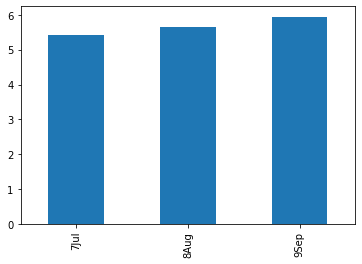

In [36]:
from pandas import Timestamp
import matplotlib.pyplot as plt


columns = ['iid', 'cid', 'invoice_date', 'total', 'bill_ctry']
data = [[42, 51, Timestamp('2009-07-06 00:00:00'), 1.98, 'Sweden'],
       [43, 53, Timestamp('2009-07-06 00:00:00'), 1.98, 'UK'],
       [44, 55, Timestamp('2009-07-07 00:00:00'), 3.96, 'Australia'],
       [45, 59, Timestamp('2009-07-08 00:00:00'), 5.94, 'India'],
       [46, 6, Timestamp('2009-07-11 00:00:00'), 8.91, 'Czech Republic'],
       [47, 15, Timestamp('2009-07-16 00:00:00'), 13.86, 'Canada'],
       [48, 29, Timestamp('2009-07-24 00:00:00'), 0.99, 'Canada'],
       [126, 35, Timestamp('2010-07-13 00:00:00'), 1.98, 'Portugal'],
       [127, 37, Timestamp('2010-07-13 00:00:00'), 1.98, 'Germany'],
       [128, 39, Timestamp('2010-07-14 00:00:00'), 3.96, 'France'],
       [129, 43, Timestamp('2010-07-15 00:00:00'), 5.94, 'France'],
       [130, 49, Timestamp('2010-07-18 00:00:00'), 8.91, 'Poland'],
       [131, 58, Timestamp('2010-07-23 00:00:00'), 13.86, 'India'],
       [132, 13, Timestamp('2010-07-31 00:00:00'), 0.99, 'Brazil'],
       [209, 18, Timestamp('2011-07-07 00:00:00'), 0.99, 'USA'],
       [210, 19, Timestamp('2011-07-20 00:00:00'), 1.98, 'USA'],
       [211, 21, Timestamp('2011-07-20 00:00:00'), 1.98, 'USA'],
       [212, 23, Timestamp('2011-07-21 00:00:00'), 3.96, 'USA'],
       [213, 27, Timestamp('2011-07-22 00:00:00'), 5.94, 'USA'],
       [214, 33, Timestamp('2011-07-25 00:00:00'), 8.91, 'Canada'],
       [215, 42, Timestamp('2011-07-30 00:00:00'), 13.86, 'France'],
       [292, 47, Timestamp('2012-07-05 00:00:00'), 13.86, 'Italy'],
       [293, 2, Timestamp('2012-07-13 00:00:00'), 0.99, 'Germany'],
       [294, 3, Timestamp('2012-07-26 00:00:00'), 1.98, 'Canada'],
       [295, 5, Timestamp('2012-07-26 00:00:00'), 1.98, 'Czech Republic'],
       [296, 7, Timestamp('2012-07-27 00:00:00'), 3.96, 'Austria'],
       [297, 11, Timestamp('2012-07-28 00:00:00'), 5.94, 'Brazil'],
       [298, 17, Timestamp('2012-07-31 00:00:00'), 10.91, 'USA'],
       [371, 8, Timestamp('2013-07-02 00:00:00'), 1.98, 'Belgium'],
       [372, 10, Timestamp('2013-07-02 00:00:00'), 1.98, 'Brazil'],
       [373, 12, Timestamp('2013-07-03 00:00:00'), 3.96, 'Brazil'],
       [374, 16, Timestamp('2013-07-04 00:00:00'), 5.94, 'USA'],
       [375, 22, Timestamp('2013-07-07 00:00:00'), 8.91, 'USA'],
       [376, 31, Timestamp('2013-07-12 00:00:00'), 13.86, 'Canada'],
       [377, 45, Timestamp('2013-07-20 00:00:00'), 0.99, 'Hungary']]

inv_jul = pd.DataFrame(data=data, columns=columns)

data = [[49, 30, Timestamp('2009-08-06 00:00:00'), 1.98, 'Canada'],
       [50, 32, Timestamp('2009-08-06 00:00:00'), 1.98, 'Canada'],
       [51, 34, Timestamp('2009-08-07 00:00:00'), 3.96, 'Portugal'],
       [52, 38, Timestamp('2009-08-08 00:00:00'), 5.94, 'Germany'],
       [53, 44, Timestamp('2009-08-11 00:00:00'), 8.91, 'Finland'],
       [54, 53, Timestamp('2009-08-16 00:00:00'), 13.86, 'UK'],
       [55, 8, Timestamp('2009-08-24 00:00:00'), 0.99, 'Belgium'],
       [133, 14, Timestamp('2010-08-13 00:00:00'), 1.98, 'Canada'],
       [134, 16, Timestamp('2010-08-13 00:00:00'), 1.98, 'USA'],
       [135, 18, Timestamp('2010-08-14 00:00:00'), 3.96, 'USA'],
       [136, 22, Timestamp('2010-08-15 00:00:00'), 5.94, 'USA'],
       [137, 28, Timestamp('2010-08-18 00:00:00'), 8.91, 'USA'],
       [138, 37, Timestamp('2010-08-23 00:00:00'), 13.86, 'Germany'],
       [139, 51, Timestamp('2010-08-31 00:00:00'), 0.99, 'Sweden'],
       [216, 56, Timestamp('2011-08-07 00:00:00'), 0.99, 'Argentina'],
       [217, 57, Timestamp('2011-08-20 00:00:00'), 1.98, 'Chile'],
       [218, 59, Timestamp('2011-08-20 00:00:00'), 1.98, 'India'],
       [219, 2, Timestamp('2011-08-21 00:00:00'), 3.96, 'Germany'],
       [220, 6, Timestamp('2011-08-22 00:00:00'), 5.94, 'Czech Republic'],
       [221, 12, Timestamp('2011-08-25 00:00:00'), 8.91, 'Brazil'],
       [222, 21, Timestamp('2011-08-30 00:00:00'), 13.86, 'USA'],
       [299, 26, Timestamp('2012-08-05 00:00:00'), 23.86, 'USA'],
       [300, 40, Timestamp('2012-08-13 00:00:00'), 0.99, 'France'],
       [301, 41, Timestamp('2012-08-26 00:00:00'), 1.98, 'France'],
       [302, 43, Timestamp('2012-08-26 00:00:00'), 1.98, 'France'],
       [303, 45, Timestamp('2012-08-27 00:00:00'), 3.96, 'Hungary'],
       [304, 49, Timestamp('2012-08-28 00:00:00'), 5.94, 'Poland'],
       [305, 55, Timestamp('2012-08-31 00:00:00'), 8.91, 'Australia'],
       [378, 46, Timestamp('2013-08-02 00:00:00'), 1.98, 'Ireland'],
       [379, 48, Timestamp('2013-08-02 00:00:00'), 1.98, 'Netherlands'],
       [380, 50, Timestamp('2013-08-03 00:00:00'), 3.96, 'Spain'],
       [381, 54, Timestamp('2013-08-04 00:00:00'), 5.94, 'UK'],
       [382, 1, Timestamp('2013-08-07 00:00:00'), 8.91, 'Brazil'],
       [383, 10, Timestamp('2013-08-12 00:00:00'), 13.86, 'Brazil'],
       [384, 24, Timestamp('2013-08-20 00:00:00'), 0.99, 'USA']]

inv_aug = pd.DataFrame(data=data, columns=columns)

data = [[56, 9, Timestamp('2009-09-06 00:00:00'), 1.98, 'Denmark'],
       [57, 11, Timestamp('2009-09-06 00:00:00'), 1.98, 'Brazil'],
       [58, 13, Timestamp('2009-09-07 00:00:00'), 3.96, 'Brazil'],
       [59, 17, Timestamp('2009-09-08 00:00:00'), 5.94, 'USA'],
       [60, 23, Timestamp('2009-09-11 00:00:00'), 8.91, 'USA'],
       [61, 32, Timestamp('2009-09-16 00:00:00'), 13.86, 'Canada'],
       [62, 46, Timestamp('2009-09-24 00:00:00'), 0.99, 'Ireland'],
       [140, 52, Timestamp('2010-09-13 00:00:00'), 1.98, 'UK'],
       [141, 54, Timestamp('2010-09-13 00:00:00'), 1.98, 'UK'],
       [142, 56, Timestamp('2010-09-14 00:00:00'), 3.96, 'Argentina'],
       [143, 1, Timestamp('2010-09-15 00:00:00'), 5.94, 'Brazil'],
       [144, 7, Timestamp('2010-09-18 00:00:00'), 8.91, 'Austria'],
       [145, 16, Timestamp('2010-09-23 00:00:00'), 13.86, 'USA'],
       [223, 35, Timestamp('2011-09-07 00:00:00'), 0.99, 'Portugal'],
       [224, 36, Timestamp('2011-09-20 00:00:00'), 1.98, 'Germany'],
       [225, 38, Timestamp('2011-09-20 00:00:00'), 1.98, 'Germany'],
       [226, 40, Timestamp('2011-09-21 00:00:00'), 3.96, 'France'],
       [227, 44, Timestamp('2011-09-22 00:00:00'), 5.94, 'Finland'],
       [228, 50, Timestamp('2011-09-25 00:00:00'), 8.91, 'Spain'],
       [229, 59, Timestamp('2011-09-30 00:00:00'), 13.86, 'India'],
       [306, 5, Timestamp('2012-09-05 00:00:00'), 16.86,
        'Czech Republic'],
       [307, 19, Timestamp('2012-09-13 00:00:00'), 1.99, 'USA'],
       [308, 20, Timestamp('2012-09-26 00:00:00'), 3.98, 'USA'],
       [309, 22, Timestamp('2012-09-26 00:00:00'), 3.98, 'USA'],
       [310, 24, Timestamp('2012-09-27 00:00:00'), 7.96, 'USA'],
       [311, 28, Timestamp('2012-09-28 00:00:00'), 11.94, 'USA'],
       [385, 25, Timestamp('2013-09-02 00:00:00'), 1.98, 'USA'],
       [386, 27, Timestamp('2013-09-02 00:00:00'), 1.98, 'USA'],
       [387, 29, Timestamp('2013-09-03 00:00:00'), 3.96, 'Canada'],
       [388, 33, Timestamp('2013-09-04 00:00:00'), 5.94, 'Canada'],
       [389, 39, Timestamp('2013-09-07 00:00:00'), 8.91, 'France'],
       [390, 48, Timestamp('2013-09-12 00:00:00'), 13.86, 'Netherlands'],
       [391, 3, Timestamp('2013-09-20 00:00:00'), 0.99, 'Canada']]

inv_sep = pd.DataFrame(data=data, columns=columns)

for i in [inv_jul, inv_aug, inv_sep]:
    display(i)
    print("======================================================")

# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], keys=['7Jul', '8Aug', '9Sep'])
print("\n\npd.concat([inv_jul, inv_aug, inv_sep], keys=['7Jul', '8Aug', '9Sep'])")
display(pd.concat([inv_jul, inv_aug, inv_sep], keys=['7Jul', '8Aug', '9Sep']).head())

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0)["total"].agg("mean")
print("\n\ninv_jul_thr_sep.groupby(level=0)['total'].agg('mean')\n\n")
display(inv_jul_thr_sep.groupby(level=0)['total'].agg('mean'))

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind="bar")
plt.show()

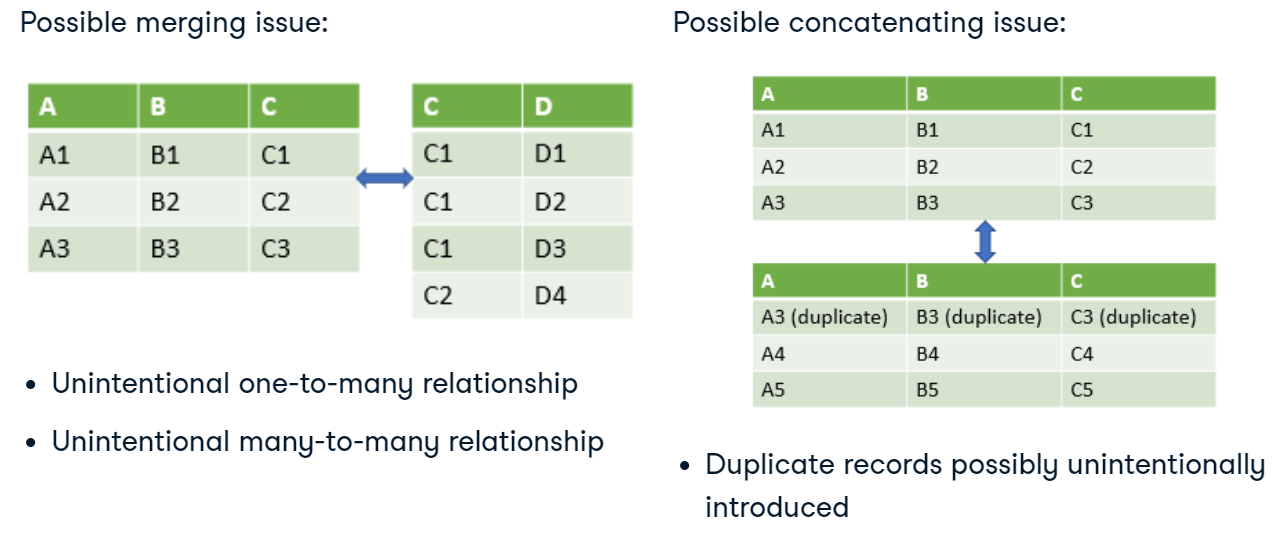

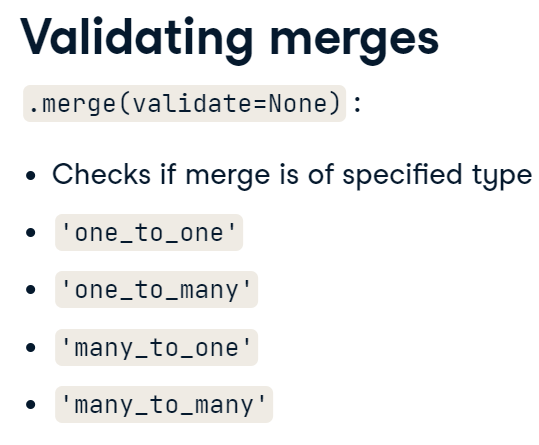

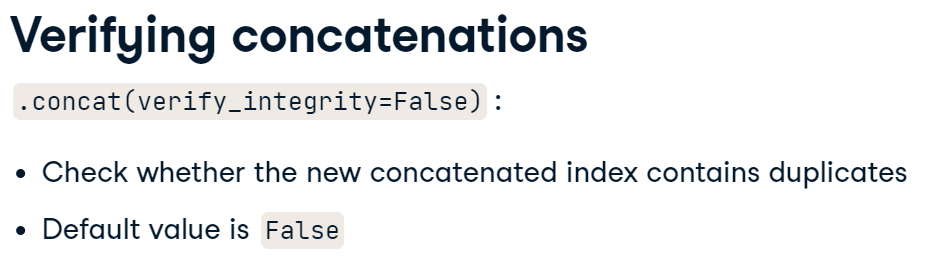

# **Concatenate and merge to find common songs**

You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a ***semi-join*** to return only the most popular classical music tracks.

* Concatenate the `classic_18` and `classic_19` tables vertically where the index goes from 0 to n-1, and save to `classic_18_19`.
* Concatenate the `pop_18` and `pop_19` tables vertically where the index goes from 0 to n-1, and save to `pop_18_19`.
* With `classic_18_19` on the left, merge it with `pop_18_19` on `tid` using an inner join.
* Use `.isin()` to filter `classic_18_19` where `tid` is in `classic_pop`.

In [19]:
import pandas as pd

columns = ['pid', 'tid']
data = [[  12, 3483], 
       [  12, 3416],
       [  12, 3489],
       [  12, 3479],
       [  12, 3440],
       [  12, 3414],
       [  12, 3433],
       [  12, 3491],
       [  12, 3422],
       [  12, 3417],
       [  12, 3439],
       [  12, 3447],
       [  12, 3454],
       [  12, 3497],
       [  12, 3488],
       [  12, 3501],
       [  12, 3484],
       [  12, 3438],
       [  12, 3409],
       [  12, 3419],
       [  12, 3444],
       [  12, 3445],
       [  12, 3495],
       [  12, 3449],
       [  12, 3450]]

classic_18 = pd.DataFrame(data=data, columns=columns)

data = [[  12, 3482],
       [  12, 3434],
       [  12, 3448],
       [  12, 3499],
       [  12, 3425],
       [  12, 3493],
       [  12, 3446],
       [  12, 3432],
       [  12, 3410],
       [  12, 3441],
       [  12, 3407],
       [  12, 3436],
       [  12, 3418],
       [  12, 3415],
       [  12, 3452],
       [  12, 3403],
       [  12, 3405],
       [  12, 3413],
       [  12, 3424],
       [  12, 3443],
       [  12, 3430],
       [  12, 3487],
       [  12, 3494],
       [  12, 3437],
       [  12, 3420],
       [  12, 3435],
       [  12, 3502]]

classic_19 = pd.DataFrame(data=data, columns=columns)

data = [[   1, 3063],
       [   1, 2712],
       [   1, 2641],
       [   1, 2271],
       [   1,  919],
       [   1,  794],
       [   1, 2381],
       [   1, 1889],
       [   1, 3439],
       [   1, 2042],
       [   1, 1718],
       [   1, 1928],
       [   3, 2920],
       [   1, 2126],
       [   1,  539],
       [   1,  361],
       [   1, 3457],
       [   1,  743],
       [   1, 2133],
       [   1, 1258],
       [   1, 1822],
       [   1, 2394],
       [   1, 3455],
       [   1,  829],
       [   1, 1793],
       [   1, 2592],
       [   1, 1761],
       [   1,  891],
       [   1, 1295],
       [   1, 1191],
       [   1,  526],
       [   1, 1346],
       [   1, 2563],
       [   1, 1560],
       [   1,  692],
       [   3, 3243],
       [   1, 1266],
       [   1,  618],
       [   1, 2653],
       [   1, 1218],
       [   1, 2587],
       [   1, 1019],
       [   1, 2087],
       [   1, 1382],
       [   1, 2445],
       [   1, 2542],
       [   1, 3385],
       [   1, 1333],
       [   1,  126],
       [   1, 1396],
       [   1, 3367],
       [   1,  987],
       [   1, 1837],
       [   1, 2212],
       [   1,  657],
       [   1, 3117],
       [   1, 2560],
       [   1,  110],
       [   1, 1617],
       [   1, 2539],
       [   1,  375],
       [   1, 1601],
       [   3, 2840],
       [   1, 3049],
       [   1, 1712],
       [   1, 2682],
       [   1, 1254],
       [   1, 1298],
       [   1,  441],
       [   1,   43],
       [   1, 1779],
       [   1, 1903],
       [   1, 1966],
       [   3, 3429],
       [   1, 2447],
       [   3, 2897],
       [   3, 3344],
       [   1, 1607],
       [   1,  432],
       [   1, 2304],
       [   3, 2857],
       [   3, 2877],
       [   1, 2953],
       [   1,  765],
       [   1, 1273],
       [   1, 2477],
       [   1,  531],
       [   1, 1408],
       [   1, 1646],
       [   1, 1225],
       [   1, 3031],
       [   1, 2209],
       [   3, 2908],
       [   1,  612],
       [   1, 1739],
       [   1, 2155],
       [   1, 1744],
       [   1, 1692],
       [   1,  671],
       [   1,  834],
       [   1, 3259],
       [   1, 1125],
       [   1,  899],
       [   1,  563],
       [   1,   29],
       [   1,  241],
       [   1, 1370],
       [   1, 1233],
       [   1, 1924],
       [   1,  314],
       [   1, 2532],
       [   1,  525],
       [   1,  166],
       [   1, 2458],
       [   1,  857],
       [   1, 1410],
       [   1, 1112],
       [   1, 2612],
       [   3, 2841],
       [   1, 1137],
       [   1,  591],
       [   1,  443],
       [   1, 2006],
       [   1, 2763],
       [   3, 3247],
       [   1, 1426],
       [   1, 1325],
       [   1, 1376],
       [   1,  903],
       [   3, 2859],
       [   1, 2598],
       [   3, 3175],
       [   1,  694],
       [   1, 3376],
       [   1, 1115],
       [   1, 1557],
       [   1, 1248],
       [   1, 2200],
       [   1, 3500],
       [   1, 1523],
       [   1, 1142],
       [   1, 2320],
       [   1,   83],
       [   1, 2497],
       [   3, 3216],
       [   1,  521],
       [   1, 2987],
       [   1,  621],
       [   1, 3099],
       [   1, 2045],
       [   1, 3445],
       [   1, 2270],
       [   1, 2165],
       [   1, 2098],
       [   1, 1610],
       [   1, 1783],
       [   1, 2162],
       [   1, 2487],
       [   1,  306],
       [   1, 1199],
       [   1, 3365],
       [   1, 1476],
       [   1,  490],
       [   1, 2793],
       [   1, 2547],
       [   1, 2149],
       [   1, 2280],
       [   1,  229],
       [   1, 3119],
       [   1, 2289],
       [   1, 2702],
       [   1,  291],
       [   1, 1467],
       [   1,  869],
       [   1, 2227],
       [   3, 3171]]

pop_18 = pd.DataFrame(columns=columns, data=data)

data = [[   1, 2115],
       [   1,  297],
       [   1,  272],
       [   1, 3023],
       [   1, 1193],
       [   1, 3435],
       [   1,  385],
       [   1,  118],
       [   1, 1567],
       [   1, 1037],
       [   1, 3397],
       [   1, 2564],
       [   1, 1759],
       [   1,  404],
       [   1,  806],
       [   1, 2703],
       [   1, 1772],
       [   1, 2364],
       [   1, 2178],
       [   1, 2778],
       [   1, 2998],
       [   1, 1514],
       [   1,  745],
       [   1, 1494],
       [   1,   99],
       [   3, 3250],
       [   1,  901],
       [   1,  643],
       [   1, 3323],
       [   3, 3201],
       [   1,  574],
       [   1, 1621],
       [   1, 1678],
       [   1,  820],
       [   1, 2436],
       [   1, 2746],
       [   3, 2856],
       [   1, 1152],
       [   1, 1771],
       [   1, 2556],
       [   1, 1855],
       [   1, 1114],
       [   1, 1820],
       [   1, 2080],
       [   1, 1085],
       [   1, 1643],
       [   3, 3233],
       [   1, 2321],
       [   1, 1255],
       [   1, 1126],
       [   1, 2936],
       [   1, 1423],
       [   1, 2269],
       [   1, 3163],
       [   1, 1880],
       [   1,  129],
       [   1, 2472],
       [   1, 1383],
       [   1, 2397],
       [   1,  541],
       [   1, 1724],
       [   1,  225],
       [   1,  511],
       [   1, 2027],
       [   1,  738],
       [   1, 1991],
       [   1, 3262],
       [   1, 2405],
       [   1, 1147],
       [   1, 3127],
       [   1, 2124],
       [   1, 2112],
       [   1, 2673],
       [   1,  664],
       [   1,  622],
       [   1,  787],
       [   1,  433],
       [   1,  766],
       [   1,  515],
       [   1,  113],
       [   1, 2049],
       [   1,  833],
       [   1, 2187],
       [   1, 1261],
       [   1, 2362],
       [   1, 1049],
       [   3, 2916],
       [   1,   57],
       [   1, 3288],
       [   1, 2012],
       [   1, 2245],
       [   3, 3189],
       [   1, 2928],
       [   1, 1132],
       [   1, 1651],
       [   1, 2440],
       [   1,  209],
       [   1, 3479],
       [   1, 2781],
       [   1,  187],
       [   1,  730],
       [   1,  144],
       [   1,  848],
       [   3, 2891],
       [   3, 2883],
       [   1,  169],
       [   1, 3013],
       [   1,  533],
       [   1, 2791],
       [   1, 2072],
       [   1, 1650],
       [   3, 3246],
       [   1,  973],
       [   1, 2586],
       [   1,  950],
       [   1, 2094],
       [   1,  534],
       [   1, 2740],
       [   1,  830],
       [   1,  289],
       [   3, 3232],
       [   3, 3363],
       [   1, 1704],
       [   1, 2552],
       [   1,   22],
       [   1, 1572],
       [   1,  204],
       [   1, 2757],
       [   1, 1757],
       [   1, 1590],
       [   3, 3241],
       [   1, 2621],
       [   1, 2581],
       [   1,  161],
       [   1,  592],
       [   1,  601],
       [   1,  140],
       [   1, 1495],
       [   1,  371],
       [   1, 3427],
       [   3, 3215],
       [   1,  232],
       [   1,  260],
       [   1,  762],
       [   1,  374],
       [   1, 1365],
       [   1, 2589],
       [   1, 1713],
       [   1,  822],
       [   1,  579],
       [   1,  201],
       [   1, 2369],
       [   1,  689],
       [   1, 3449],
       [   1, 1634],
       [   1, 1794],
       [   1,  345],
       [   1, 2450],
       [   1, 1280],
       [   1, 2272],
       [   1,  495],
       [   1,  880],
       [   1, 2225],
       [   1, 2408],
       [   1, 3093],
       [   1, 2285],
       [   1, 1977],
       [   1, 1769],
       [   1, 2057],
       [   1, 2099],
       [   1, 1129],
       [   1,  596],
       [   1, 2131],
       [   1, 3161],
       [   1,  352],
       [   1,  350],
       [   1,  184],
       [   1, 3002],
       [   1, 1901],
       [   1,  160],
       [   1, 3375],
       [   1, 1870],
       [   1, 2110],
       [   1, 2276],
       [   1,    1],
       [   1,  341],
       [   1, 1445],
       [   1,  407],
       [   1, 1656],
       [   1, 2114],
       [   1, 1665],
       [   1, 3320],
       [   1,  910],
       [   1, 3437],
       [   1, 3274],
       [   1, 2942],
       [   1, 2463],
       [   1, 2459],
       [   1, 1540],
       [   1, 2060]]

pop_19 = pd.DataFrame(columns=columns, data=data)

print("classic_18")
print(classic_18.shape)
display(classic_18.sort_values("tid").head())

print("\nclassic_19")
print(classic_19.shape)
display(classic_19.sort_values("tid").head())

print("\npop_18")
print(pop_18.shape)
display(pop_18.sort_values("tid").head())

print("\npop_19")
print(pop_19.sort_values("tid").shape)
display(pop_19.head())

# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True).sort_values('tid')
print("\n\n\npd.concat([classic_18, classic_19], ignore_index=True).sort_values('tid')")
display(classic_18_19[classic_18_19["tid"] > 3424 ].head(10))


# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True).sort_values('tid')
print("\n\n\npd.concat([pop_18, pop_19], ignore_index=True).sort_values('tid')")
display(pop_18_19[pop_18_19["tid"] > 3425 ].head(10))

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on='tid', suffixes=["_classic", "_pop"])
print("\n\n\nclassic_18_19.merge(pop_18_19, on='tid')")
display(classic_pop)



# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print("\n\n\nclassic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]")
display(classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])])

classic_18
(25, 2)


,pid,tid
18,12,3409
5,12,3414
1,12,3416
9,12,3417
19,12,3419



classic_19
(27, 2)


,pid,tid
15,12,3403
16,12,3405
10,12,3407
8,12,3410
17,12,3413



pop_18
(176, 2)


,pid,tid
104,1,29
69,1,43
142,1,83
57,1,110
48,1,126



pop_19
(200, 2)


,pid,tid
0,1,2115
1,1,297
2,1,272
3,1,3023
4,1,1193





pd.concat([classic_18, classic_19], ignore_index=True).sort_values('tid')


,pid,tid
29,12,3425
45,12,3430
32,12,3432
6,12,3433
26,12,3434
50,12,3435
36,12,3436
48,12,3437
17,12,3438
10,12,3439





pd.concat([pop_18, pop_19], ignore_index=True).sort_values('tid')


,pid,tid
315,1,3427
73,3,3429
181,1,3435
369,1,3437
8,1,3439
150,1,3445
329,1,3449
22,1,3455
16,1,3457
273,1,3479





classic_18_19.merge(pop_18_19, on='tid')


,pid_classic,tid,pid_pop
0,12,3435,1
1,12,3437,1
2,12,3439,1
3,12,3445,1
4,12,3449,1
5,12,3479,1





classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]


,pid,tid
50,12,3435
48,12,3437
10,12,3439
21,12,3445
23,12,3449
3,12,3479


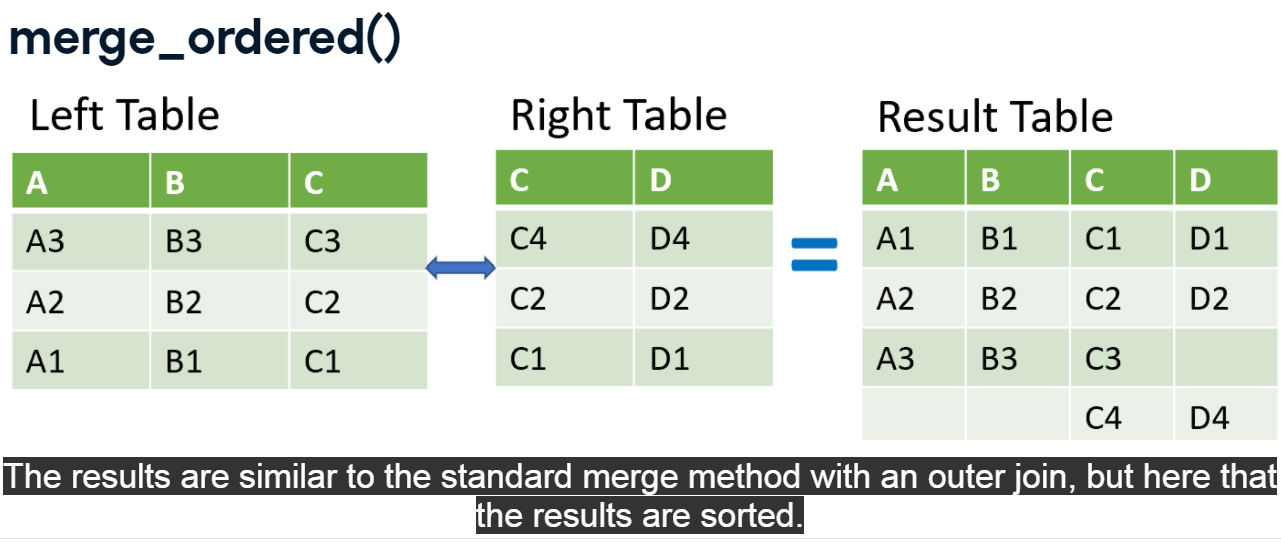

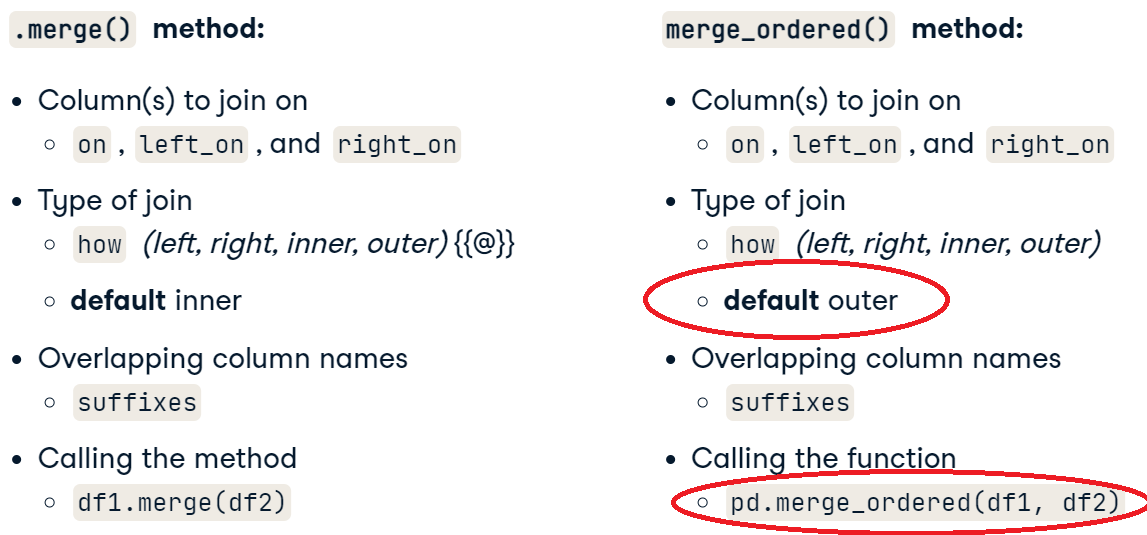

# ควรใช้เมื่อ merge ข้อมูลอนุกรมเวลา

## **Correlation between GDP and S&P500**

In this exercise, you want to analyze stock returns from the `S&P500`. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

* Use `merge_ordered()` to merge `gdp` and `sp500` using a left join on year and date. Save the results as `gdp_sp500`.
* Print `gdp_sp500` and look at the returns for the year 2018.

* Use `merge_ordered()`, again similar to before, to merge `gdp` and `sp500` use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable `gdp_sp500`.

* Subset the `gdp_sp500` table, select the `gdp` and returns columns, and save as `gdp_returns`.
* Print the correlation matrix of the `gdp_returns` table.

In [39]:
gdp = pd.read_csv("WorldBank_GDP.csv")
gdp = gdp[gdp["Country Code"]=="USA"][["Country Code", "Year",	"GDP"]]
gdp["Year"] = pd.to_datetime(gdp["Year"], format="%Y")
sp500 = pd.read_csv("S&P500.csv")
sp500["Date"] = pd.to_datetime(sp500["Date"], format="%Y")

print("gdp")
print(gdp.shape)
display(gdp.head())

print("\n\nS&P 500")
print(sp500.shape)
display(sp500.head())

# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left')

print("\n\n\npd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left')")
display(gdp_sp500)

# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left', fill_method='ffill')
print("\n\n\npd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left', fill_method='ffill')")
display(gdp_sp500)

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP', 'Returns']]

# Print gdp_returns correlation
print ("\n\n\n", gdp_returns.corr())

gdp
(10, 3)


,Country Code,Year,GDP
3,USA,2010-01-01,1.499210e+13
7,USA,2011-01-01,1.554260e+13
11,USA,2012-01-01,1.619700e+13
15,USA,2012-01-01,1.619700e+13
19,USA,2013-01-01,1.678480e+13




S&P 500
(10, 2)


,Date,Returns
0,2008-01-01,-38.49
1,2009-01-01,23.45
2,2010-01-01,12.78
3,2011-01-01,0.00
4,2012-01-01,13.41





pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left')


,Country Code,Year,GDP,Date,Returns
0,USA,2010-01-01,1.499210e+13,2010-01-01,12.78
1,USA,2011-01-01,1.554260e+13,2011-01-01,0.00
2,USA,2012-01-01,1.619700e+13,2012-01-01,13.41
3,USA,2012-01-01,1.619700e+13,2012-01-01,13.41
4,USA,2013-01-01,1.678480e+13,2013-01-01,29.60
5,USA,2014-01-01,1.752170e+13,2014-01-01,11.39
6,USA,2015-01-01,1.821930e+13,2015-01-01,-0.73
7,USA,2016-01-01,1.870720e+13,2016-01-01,9.54
8,USA,2017-01-01,1.948540e+13,2017-01-01,19.42
9,USA,2018-01-01,2.049410e+13,NaT,NaN





pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left', fill_method='ffill')


,Country Code,Year,GDP,Date,Returns
0,USA,2010-01-01,1.499210e+13,2010-01-01,12.78
1,USA,2011-01-01,1.554260e+13,2011-01-01,0.00
2,USA,2012-01-01,1.619700e+13,2012-01-01,13.41
3,USA,2012-01-01,1.619700e+13,2012-01-01,13.41
4,USA,2013-01-01,1.678480e+13,2013-01-01,29.60
5,USA,2014-01-01,1.752170e+13,2014-01-01,11.39
6,USA,2015-01-01,1.821930e+13,2015-01-01,-0.73
7,USA,2016-01-01,1.870720e+13,2016-01-01,9.54
8,USA,2017-01-01,1.948540e+13,2017-01-01,19.42
9,USA,2018-01-01,2.049410e+13,2017-01-01,19.42





               GDP   Returns
GDP      1.000000  0.212173
Returns  0.212173  1.000000


# **Phillips curve using merge_ordered()**

There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing `unemployment` and `inflation` data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

* Use `merge_ordered()` to merge the `inflation` and `unemployment` tables on `date` with an inner join, and save the results as `inflation_unemploy`.
* Using `inflation_unemploy`, create a scatter plot with `unemployment_rate` on the horizontal axis and `cpi` (inflation) on the vertical axis.

unemployment


,date,unemployment_rate
0,2013-06-01,7.5
1,2014-01-01,6.7
2,2014-06-01,6.1
3,2015-01-01,5.6
4,2015-06-01,5.3




inflation


,date,cpi,seriesid,data_type
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
1,2014-02-01,235.547,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
2,2014-03-01,236.028,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
3,2014-04-01,236.468,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
4,2014-05-01,236.918,CUSR0000SA0,SEASONALLY ADJUSTED INDEX





pd.merge_ordered(inflation, unemployment, on='date', how='inner')


,date,cpi,seriesid,data_type,unemployment_rate
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.7
1,2014-06-01,237.231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.1
2,2015-01-01,234.718,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.6
3,2015-06-01,237.684,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.3
4,2016-01-01,237.833,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.0
5,2016-06-01,240.167,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.9
6,2017-01-01,243.780,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.7
7,2017-06-01,244.182,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.3
8,2018-01-01,248.884,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.1
9,2018-06-01,251.134,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.0


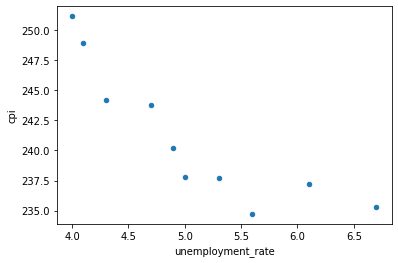

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

unemployment = pd.DataFrame(columns=['date', 'unemployment_rate'], data=[['2013-06-01', 7.5],
       ['2014-01-01', 6.7],
       ['2014-06-01', 6.1],
       ['2015-01-01', 5.6],
       ['2015-06-01', 5.3],
       ['2016-01-01', 5.0],
       ['2016-06-01', 4.9],
       ['2017-01-01', 4.7],
       ['2017-06-01', 4.3],
       ['2018-01-01', 4.1],
       ['2018-06-01', 4.0],
       ['2019-01-01', 3.9],
       ['2019-06-01', 3.7],
       ['2020-01-01', 3.5]])

inflation = pd.DataFrame(columns=['date', 'cpi', 'seriesid', 'data_type'], data=[['2014-01-01', 235.28799999999998, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2014-02-01', 235.547, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2014-03-01', 236.028, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2014-04-01', 236.468, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2014-05-01', 236.918, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2014-06-01', 237.231, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2014-07-01', 237.498, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2014-08-01', 237.46, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'],
       ['2014-09-01', 237.477, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2014-10-01', 237.43, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'],
       ['2014-11-01', 236.983, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2014-12-01', 236.252, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2015-01-01', 234.718, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2015-02-01', 235.236, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2015-03-01', 236.005, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2015-04-01', 236.15599999999998, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2015-05-01', 236.97400000000002, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2015-06-01', 237.68400000000003, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2015-07-01', 238.053, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2015-08-01', 238.028, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2015-09-01', 237.50599999999997, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2015-10-01', 237.78099999999998, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2015-11-01', 238.016, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2015-12-01', 237.817, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2016-01-01', 237.833, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2016-02-01', 237.46900000000002, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2016-03-01', 238.03799999999998, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2016-04-01', 238.827, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2016-05-01', 239.46400000000003, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2016-06-01', 240.167, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2016-07-01', 240.15, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'],
       ['2016-08-01', 240.602, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2016-09-01', 241.051, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2016-10-01', 241.69099999999997, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2016-11-01', 242.02900000000002, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2016-12-01', 242.77200000000002, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2017-01-01', 243.78, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'],
       ['2017-02-01', 243.96099999999998, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2017-03-01', 243.74900000000002, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2017-04-01', 244.051, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2017-05-01', 243.96200000000002, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2017-06-01', 244.18200000000002, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2017-07-01', 244.39, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'],
       ['2017-08-01', 245.297, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2017-09-01', 246.418, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2017-10-01', 246.58700000000002, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2017-11-01', 247.332, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2017-12-01', 247.90099999999998, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2018-01-01', 248.88400000000001, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2018-02-01', 249.36900000000003, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2018-03-01', 249.498, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2018-04-01', 249.956, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2018-05-01', 250.646, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2018-06-01', 251.13400000000001, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2018-07-01', 251.597, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2018-08-01', 251.87900000000002, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2018-09-01', 252.01, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'],
       ['2018-10-01', 252.794, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX'],
       ['2018-11-01', 252.76, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'],
       ['2018-12-01', 252.72299999999998, 'CUSR0000SA0',
        'SEASONALLY ADJUSTED INDEX']])

unemployment["date"] = pd.to_datetime(unemployment["date"])
inflation["date"] = pd.to_datetime(inflation["date"])

print("unemployment")
display(unemployment.head())

print("\n\ninflation")
display(inflation.head())

# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')

# Print inflation_unemploy 
print("\n\n\npd.merge_ordered(inflation, unemployment, on='date', how='inner')")
display(inflation_unemploy)
print("\n\n")

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi')
plt.show()

# **merge_ordered() caution, multiple columns**

When using `merge_ordered()` to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

* Use `merge_ordered()` on `gdp` and `pop`, merging on columns `date` and `country` with the fill feature, save to `ctry_date`.
* Perform the same merge of `gdp` and `pop`, but join on `country` and `date` (reverse of step 1) with the fill feature, saving this as `date_ctry`.

In [62]:
from pandas import Timestamp
gdp = pd.DataFrame(columns=['date', 'country', 'gdp', 'series_code'], data=[[Timestamp('1990-01-01 00:00:00'), 'Australia', 158051.1324,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-04-01 00:00:00'), 'Australia', 158263.5816,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-07-01 00:00:00'), 'Australia', 157329.279,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-09-01 00:00:00'), 'Australia', 158240.6781,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-01-01 00:00:00'), 'Australia', 156195.9535,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-04-01 00:00:00'), 'Australia', 155989.0327,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-07-01 00:00:00'), 'Australia', 156635.8576,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-09-01 00:00:00'), 'Australia', 156744.0566,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-01-01 00:00:00'), 'Australia', 157916.0811,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-04-01 00:00:00'), 'Australia', 159047.8271,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-07-01 00:00:00'), 'Australia', 160658.176,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-09-01 00:00:00'), 'Australia', 163960.2207,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-01-01 00:00:00'), 'Australia', 165097.4951,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-04-01 00:00:00'), 'Australia', 166027.059,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-07-01 00:00:00'), 'Australia', 166203.1786,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-09-01 00:00:00'), 'Australia', 169279.3479,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-01-01 00:00:00'), 'Sweden', 79837.84599,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-04-01 00:00:00'), 'Sweden', 80582.28597000001,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-07-01 00:00:00'), 'Sweden', 79974.36017,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-09-01 00:00:00'), 'Sweden', 80106.49738,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-01-01 00:00:00'), 'Sweden', 79524.24192,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-04-01 00:00:00'), 'Sweden', 79073.05901,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-07-01 00:00:00'), 'Sweden', 79084.77036000001,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-09-01 00:00:00'), 'Sweden', 79740.60625,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-01-01 00:00:00'), 'Sweden', 79390.92175,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-04-01 00:00:00'), 'Sweden', 79060.28297999999,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-07-01 00:00:00'), 'Sweden', 78904.60477,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-09-01 00:00:00'), 'Sweden', 76996.83684,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-01-01 00:00:00'), 'Sweden', 75783.58777,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-04-01 00:00:00'), 'Sweden', 76708.54823,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-07-01 00:00:00'), 'Sweden', 77662.01816,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-09-01 00:00:00'), 'Sweden', 77703.30364,
        'NYGDPMKTPSAKD']])

pop = pd.DataFrame(columns=['date', 'country', 'pop', 'series_code'], data=[[Timestamp('1990-01-01 00:00:00'), 'Australia', 17065100,
        'SP.POP.TOTL'],
       [Timestamp('1991-01-01 00:00:00'), 'Australia', 17284000,
        'SP.POP.TOTL'],
       [Timestamp('1992-01-01 00:00:00'), 'Australia', 17495000,
        'SP.POP.TOTL'],
       [Timestamp('1993-01-01 00:00:00'), 'Australia', 17667000,
        'SP.POP.TOTL'],
       [Timestamp('1990-01-01 00:00:00'), 'Sweden', 8558835,
        'SP.POP.TOTL'],
       [Timestamp('1991-01-01 00:00:00'), 'Sweden', 8617375,
        'SP.POP.TOTL'],
       [Timestamp('1992-01-01 00:00:00'), 'Sweden', 8668067,
        'SP.POP.TOTL'],
       [Timestamp('1993-01-01 00:00:00'), 'Sweden', 8718561,
        'SP.POP.TOTL']])

print("gdp")
display(gdp.head())

print("\n\npop")
display(pop.head())

# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['date', 'country'], fill_method='ffill')
print("\n\n\npd.merge_ordered(gdp, pop, on=['date', 'country'], fill_method='ffill')")
display(pd.merge_ordered(gdp, pop, on=['date', 'country'], fill_method='ffill').head())

# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')
print("\n\n\npd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')")
display(pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill').head())


gdp


,date,country,gdp,series_code
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.5816,NYGDPMKTPSAKD
2,1990-07-01,Australia,157329.2790,NYGDPMKTPSAKD
3,1990-09-01,Australia,158240.6781,NYGDPMKTPSAKD
4,1991-01-01,Australia,156195.9535,NYGDPMKTPSAKD




pop


,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL
2,1992-01-01,Australia,17495000,SP.POP.TOTL
3,1993-01-01,Australia,17667000,SP.POP.TOTL
4,1990-01-01,Sweden,8558835,SP.POP.TOTL





pd.merge_ordered(gdp, pop, on=['date', 'country'], fill_method='ffill')


,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-01-01,Sweden,79837.84599,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-04-01,Sweden,80582.28597,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,8558835,SP.POP.TOTL





pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')


,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,158263.5816,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,157329.2790,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,158240.6781,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,156195.9535,NYGDPMKTPSAKD,17284000,SP.POP.TOTL


When you merge on `date` first, the table is sorted by `date` then `country`. When forward fill is applied, Sweden's population value in January is used to fill in the missing values for both Australia and the Sweden for the remainder of the year. This is not what you want. The fill forward is using unintended data to fill in the missing values. However, when you merge on `country` first, the table is sorted by `country` then `date`, so the forward fill is applied appropriately in this situation.

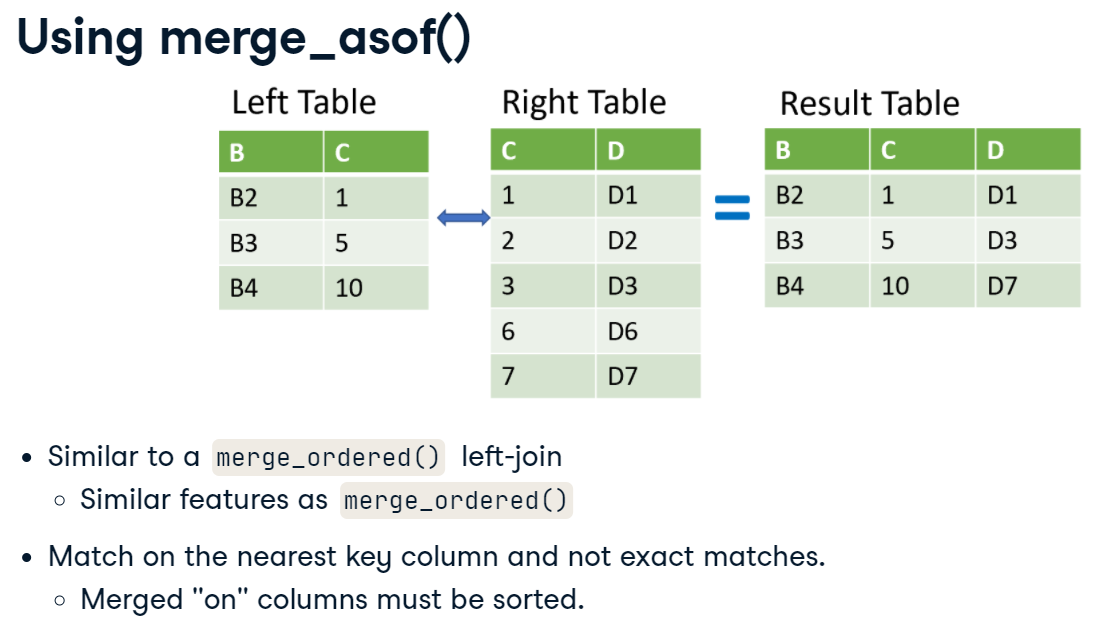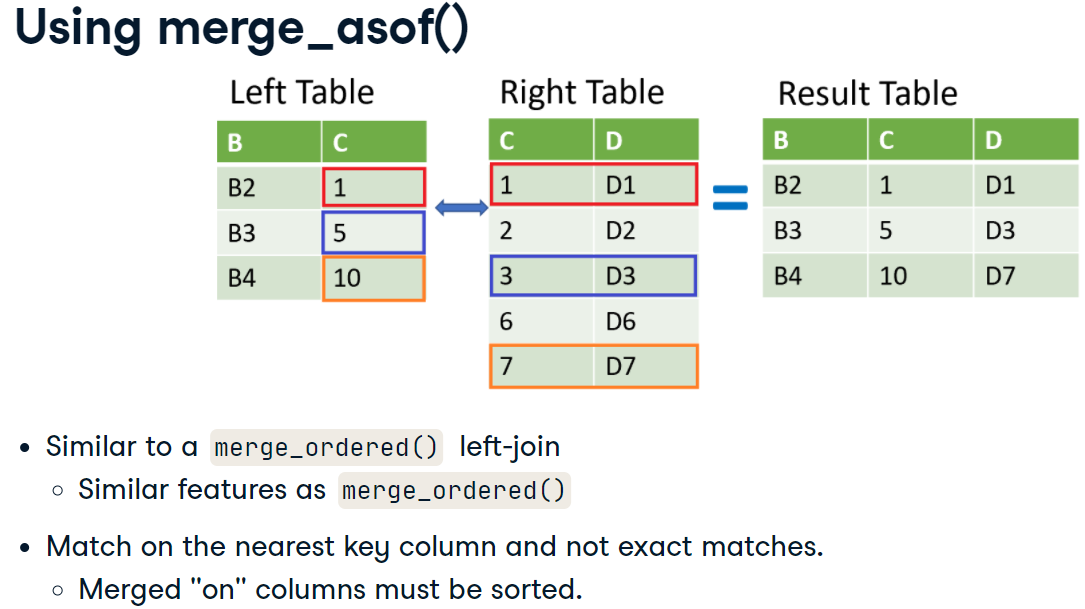

# **Using merge_asof() to study stocks**

You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas `.diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

* Use `merge_asof()` to merge `jpm` (left table) and `wells` together on the `date_time` column, where the rows with the `nearest` times are matched, and with `suffixes=('', '_wells')`. Save to `jpm_wells`.

* Use `merge_asof()` to merge `jpm_wells` (left table) and `bac` together on the `date_time` column, where the rows with the closest times are matched, and with `suffixes=('_jpm', '_bac')`. Save to `jpm_wells_bac`.
* Using `price_diffs`, create a line plot of the close price of JPM, WFC, and BAC only.

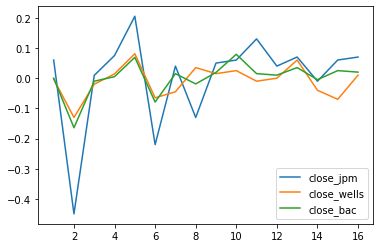

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timestamp

jpm = pd.DataFrame(columns=['date_time', 'close'], data=[[Timestamp('2017-11-17 15:35:17'), 98.12],
       [Timestamp('2017-11-17 15:40:04'), 98.18],
       [Timestamp('2017-11-17 15:45:01'), 97.7307],
       [Timestamp('2017-11-17 15:50:55'), 97.74],
       [Timestamp('2017-11-17 15:55:00'), 97.815],
       [Timestamp('2017-11-17 16:00:30'), 98.02],
       [Timestamp('2017-11-17 16:05:07'), 97.8],
       [Timestamp('2017-11-17 16:10:08'), 97.84],
       [Timestamp('2017-11-17 16:15:11'), 97.71],
       [Timestamp('2017-11-17 16:20:29'), 97.76],
       [Timestamp('2017-11-17 16:25:25'), 97.82],
       [Timestamp('2017-11-17 16:30:53'), 97.95],
       [Timestamp('2017-11-17 16:35:11'), 97.99],
       [Timestamp('2017-11-17 16:40:44'), 98.06],
       [Timestamp('2017-11-17 16:45:52'), 98.05],
       [Timestamp('2017-11-17 16:50:37'), 98.1101],
       [Timestamp('2017-11-17 16:55:02'), 98.18]])
wells = pd.DataFrame(columns=['date_time', 'close'], data=[[Timestamp('2017-11-17 15:35:08'), 54.3227],
       [Timestamp('2017-11-17 15:40:00'), 54.32],
       [Timestamp('2017-11-17 15:45:32'), 54.19],
       [Timestamp('2017-11-17 15:50:07'), 54.17],
       [Timestamp('2017-11-17 15:55:00'), 54.1841],
       [Timestamp('2017-11-17 16:00:30'), 54.265],
       [Timestamp('2017-11-17 16:05:52'), 54.2],
       [Timestamp('2017-11-17 16:10:22'), 54.155],
       [Timestamp('2017-11-17 16:15:43'), 54.19],
       [Timestamp('2017-11-17 16:20:07'), 54.205],
       [Timestamp('2017-11-17 16:25:13'), 54.23],
       [Timestamp('2017-11-17 16:30:04'), 54.22],
       [Timestamp('2017-11-17 16:35:32'), 54.22],
       [Timestamp('2017-11-17 16:40:09'), 54.28],
       [Timestamp('2017-11-17 16:45:24'), 54.24],
       [Timestamp('2017-11-17 16:50:28'), 54.17],
       [Timestamp('2017-11-17 16:55:42'), 54.18]])
bac = pd.DataFrame(columns=['date_time', 'close'], data=[[Timestamp('2017-11-17 15:35:17'), 26.552],
       [Timestamp('2017-11-17 15:40:06'), 26.552],
       [Timestamp('2017-11-17 15:45:05'), 26.388],
       [Timestamp('2017-11-17 15:50:34'), 26.378],
       [Timestamp('2017-11-17 15:55:06'), 26.383000000000003],
       [Timestamp('2017-11-17 16:00:18'), 26.451999999999998],
       [Timestamp('2017-11-17 16:05:20'), 26.373],
       [Timestamp('2017-11-17 16:10:05'), 26.388],
       [Timestamp('2017-11-17 16:15:07'), 26.369],
       [Timestamp('2017-11-17 16:20:29'), 26.388],
       [Timestamp('2017-11-17 16:25:00'), 26.467],
       [Timestamp('2017-11-17 16:30:18'), 26.482],
       [Timestamp('2017-11-17 16:35:08'), 26.491999999999997],
       [Timestamp('2017-11-17 16:40:46'), 26.526999999999997],
       [Timestamp('2017-11-17 16:45:55'), 26.522],
       [Timestamp('2017-11-17 16:50:05'), 26.546999999999997],
       [Timestamp('2017-11-17 16:55:02'), 26.566999999999997]])

# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', direction='nearest', suffixes=('', '_wells'))

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', direction='nearest', suffixes=('_jpm', '_bac'))


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=["close_jpm", "close_wells", "close_bac"])
plt.show()


# **Using merge_asof() to create dataset**

The `merge_asof()` function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given `gdp`, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table `recession` has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use `merge_asof()` to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

* Using `merge_asof()`, merge `gdp` and `recession` on `date`, with `gdp` as the left table. Save to the variable `gdp_recession`.
* Create a list using a list comprehension and a conditional expression, named `is_recession`, where for each row if the `gdp_recession['econ_status']` value is equal to `'recession'` then enter `'r'` else `'g'`.
* Using `gdp_recession`, plot a bar chart of `gdp` versus `date`, setting the color argument equal to `is_recession`.

gdp


,date,gdp
0,1979-01-01,2526.610
1,1979-04-01,2591.247
2,1979-07-01,2667.565
3,1979-10-01,2723.883
4,1980-01-01,2789.842
5,1980-04-01,2797.352
6,1980-07-01,2856.483
7,1980-10-01,2985.557
8,1981-01-01,3124.206
9,1981-04-01,3162.532




recession


,date,econ_status
0,1980-01-01,recession
1,1980-08-01,normal
2,1981-07-01,recession
3,1982-12-01,normal
4,1990-07-01,recession





pd.merge_asof(gdp, recession, on='date')


,date,gdp,econ_status
0,1979-01-01,2526.610,NaN
1,1979-04-01,2591.247,NaN
2,1979-07-01,2667.565,NaN
3,1979-10-01,2723.883,NaN
4,1980-01-01,2789.842,recession
5,1980-04-01,2797.352,recession
6,1980-07-01,2856.483,recession
7,1980-10-01,2985.557,normal
8,1981-01-01,3124.206,normal
9,1981-04-01,3162.532,normal


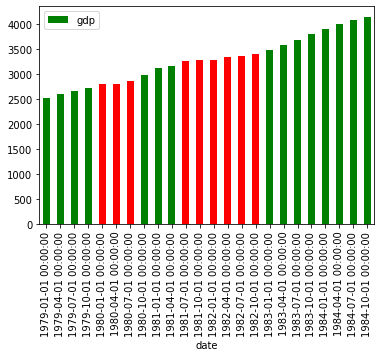

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timestamp

gdp = pd.DataFrame(columns=['date', 'gdp'], data=[[Timestamp('1979-01-01 00:00:00'), 2526.61],
       [Timestamp('1979-04-01 00:00:00'), 2591.2470000000003],
       [Timestamp('1979-07-01 00:00:00'), 2667.565],
       [Timestamp('1979-10-01 00:00:00'), 2723.883],
       [Timestamp('1980-01-01 00:00:00'), 2789.842],
       [Timestamp('1980-04-01 00:00:00'), 2797.3520000000003],
       [Timestamp('1980-07-01 00:00:00'), 2856.4829999999997],
       [Timestamp('1980-10-01 00:00:00'), 2985.5570000000002],
       [Timestamp('1981-01-01 00:00:00'), 3124.2059999999997],
       [Timestamp('1981-04-01 00:00:00'), 3162.532],
       [Timestamp('1981-07-01 00:00:00'), 3260.6090000000004],
       [Timestamp('1981-10-01 00:00:00'), 3280.8179999999998],
       [Timestamp('1982-01-01 00:00:00'), 3274.302],
       [Timestamp('1982-04-01 00:00:00'), 3331.972],
       [Timestamp('1982-07-01 00:00:00'), 3366.322],
       [Timestamp('1982-10-01 00:00:00'), 3402.5609999999997],
       [Timestamp('1983-01-01 00:00:00'), 3473.413],
       [Timestamp('1983-04-01 00:00:00'), 3578.848],
       [Timestamp('1983-07-01 00:00:00'), 3689.179],
       [Timestamp('1983-10-01 00:00:00'), 3794.7059999999997],
       [Timestamp('1984-01-01 00:00:00'), 3908.054],
       [Timestamp('1984-04-01 00:00:00'), 4009.6009999999997],
       [Timestamp('1984-07-01 00:00:00'), 4084.25],
       [Timestamp('1984-10-01 00:00:00'), 4148.5509999999995]])
recession = pd.DataFrame(columns=['date', 'econ_status'], data=[[Timestamp('1980-01-01 00:00:00'), 'recession'],
       [Timestamp('1980-08-01 00:00:00'), 'normal'],
       [Timestamp('1981-07-01 00:00:00'), 'recession'],
       [Timestamp('1982-12-01 00:00:00'), 'normal'],
       [Timestamp('1990-07-01 00:00:00'), 'recession'],
       [Timestamp('1991-04-01 00:00:00'), 'normal'],
       [Timestamp('2001-03-01 00:00:00'), 'recession'],
       [Timestamp('2001-12-01 00:00:00'), 'normal'],
       [Timestamp('2007-12-01 00:00:00'), 'recession'],
       [Timestamp('2009-07-01 00:00:00'), 'normal']])

print("gdp")
display(gdp.head(10))

print("\n\nrecession")
display(recession.head())

# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')
print("\n\n\npd.merge_asof(gdp, recession, on='date')")
display(pd.merge_asof(gdp, recession, on='date').head(10))

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

merge_asof() allowed you to quickly add a flag to the gdp dataset by matching between two different dates, in one line of code! If you were to perform the same task using subsetting, it would have taken a lot more code.



# **Subsetting rows with .query()**

In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the `.query()` method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the `.query()` method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

* Use `merge_ordered()` on `gdp` and `pop` on columns `country` and `date` with the fill feature, save to `gdp_pop` and print.
* Add a column named `gdp_per_capita` to `gdp_pop` that divides `gdp` by `pop`.
* Pivot `gdp_pop` so `values='gdp_per_capita', index='date'`, and `columns='country'`, save as `gdp_pivot`.
* Use `.query()` to select rows from `gdp_pivot` where date is greater than equal to `1991-01-01`". Save as `recent_gdp_pop`.

gdp
(32, 4)


,date,country,gdp,series_code
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.5816,NYGDPMKTPSAKD
2,1990-07-01,Australia,157329.2790,NYGDPMKTPSAKD
3,1990-09-01,Australia,158240.6781,NYGDPMKTPSAKD
4,1991-01-01,Australia,156195.9535,NYGDPMKTPSAKD




pop
(8, 4)


,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL
2,1992-01-01,Australia,17495000,SP.POP.TOTL
3,1993-01-01,Australia,17667000,SP.POP.TOTL
4,1990-01-01,Sweden,8558835,SP.POP.TOTL





pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')


,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,158263.5816,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,157329.2790,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,158240.6781,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,156195.9535,NYGDPMKTPSAKD,17284000,SP.POP.TOTL





gdp_pop.pivot_table(values='gdp_per_capita', index='date', columns='country')


country,Australia,Sweden
date,,
1990-01-01,0.009262,0.009328
1990-04-01,0.009274,0.009415
1990-07-01,0.009219,0.009344
1990-09-01,0.009273,0.009360
1991-01-01,0.009037,0.009228


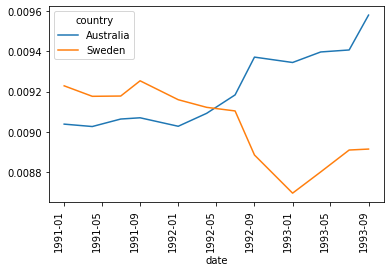

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timestamp

gdp = pd.DataFrame(columns=['date', 'country', 'gdp', 'series_code'], data=[[Timestamp('1990-01-01 00:00:00'), 'Australia', 158051.1324,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-04-01 00:00:00'), 'Australia', 158263.5816,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-07-01 00:00:00'), 'Australia', 157329.279,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-09-01 00:00:00'), 'Australia', 158240.6781,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-01-01 00:00:00'), 'Australia', 156195.9535,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-04-01 00:00:00'), 'Australia', 155989.0327,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-07-01 00:00:00'), 'Australia', 156635.8576,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-09-01 00:00:00'), 'Australia', 156744.0566,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-01-01 00:00:00'), 'Australia', 157916.0811,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-04-01 00:00:00'), 'Australia', 159047.8271,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-07-01 00:00:00'), 'Australia', 160658.176,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-09-01 00:00:00'), 'Australia', 163960.2207,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-01-01 00:00:00'), 'Australia', 165097.4951,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-04-01 00:00:00'), 'Australia', 166027.059,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-07-01 00:00:00'), 'Australia', 166203.1786,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-09-01 00:00:00'), 'Australia', 169279.3479,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-01-01 00:00:00'), 'Sweden', 79837.84599,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-04-01 00:00:00'), 'Sweden', 80582.28597000001,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-07-01 00:00:00'), 'Sweden', 79974.36017,
        'NYGDPMKTPSAKD'],
       [Timestamp('1990-09-01 00:00:00'), 'Sweden', 80106.49738,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-01-01 00:00:00'), 'Sweden', 79524.24192,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-04-01 00:00:00'), 'Sweden', 79073.05901,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-07-01 00:00:00'), 'Sweden', 79084.77036000001,
        'NYGDPMKTPSAKD'],
       [Timestamp('1991-09-01 00:00:00'), 'Sweden', 79740.60625,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-01-01 00:00:00'), 'Sweden', 79390.92175,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-04-01 00:00:00'), 'Sweden', 79060.28297999999,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-07-01 00:00:00'), 'Sweden', 78904.60477,
        'NYGDPMKTPSAKD'],
       [Timestamp('1992-09-01 00:00:00'), 'Sweden', 76996.83684,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-01-01 00:00:00'), 'Sweden', 75783.58777,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-04-01 00:00:00'), 'Sweden', 76708.54823,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-07-01 00:00:00'), 'Sweden', 77662.01816,
        'NYGDPMKTPSAKD'],
       [Timestamp('1993-09-01 00:00:00'), 'Sweden', 77703.30364,
        'NYGDPMKTPSAKD']])

pop = pd.DataFrame(columns=['date', 'country', 'pop', 'series_code'], data=[[Timestamp('1990-01-01 00:00:00'), 'Australia', 17065100,
        'SP.POP.TOTL'],
       [Timestamp('1991-01-01 00:00:00'), 'Australia', 17284000,
        'SP.POP.TOTL'],
       [Timestamp('1992-01-01 00:00:00'), 'Australia', 17495000,
        'SP.POP.TOTL'],
       [Timestamp('1993-01-01 00:00:00'), 'Australia', 17667000,
        'SP.POP.TOTL'],
       [Timestamp('1990-01-01 00:00:00'), 'Sweden', 8558835,
        'SP.POP.TOTL'],
       [Timestamp('1991-01-01 00:00:00'), 'Sweden', 8617375,
        'SP.POP.TOTL'],
       [Timestamp('1992-01-01 00:00:00'), 'Sweden', 8668067,
        'SP.POP.TOTL'],
       [Timestamp('1993-01-01 00:00:00'), 'Sweden', 8718561,
        'SP.POP.TOTL']])

print("gdp")
print(gdp.shape)
display(gdp.head())

print("\n\npop")
print(pop.shape)
display(pop.head())

# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')
print("\n\n\npd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')")
display(pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill').head())

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']


# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table(values='gdp_per_capita', index='date', columns='country')
print("\n\n\ngdp_pop.pivot_table(values='gdp_per_capita', index='date', columns='country')")
display(gdp_pop.pivot_table(values='gdp_per_capita', index='date', columns='country').head())

# Select dates equal to or greater than 2016-01-01
recent_gdp_pop = gdp_pivot.query("date >= '1991-01-01'")

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

# **Using .melt() to reshape government data**

The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using `.melt()`. You will need to add a `date` column to the table and sort by it to plot the data correctly.

* Use `.melt()` to unpivot all of the columns of `ur_wide` except `year` and ensure that the columns with the months and values are named `month` and `unempl_rate`, respectively. Save the result as `ur_tall`.
* Add a column to `ur_tall` named `date` which combines the `year` and month columns as year-month format into a larger string, and converts it to a date data type.
* Sort `ur_tall` by `date` and save as `ur_sorted`.
* Using `ur_sorted`, plot `unempl_rate` on the y-axis and `date` on the x-axis.

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6




ur_wide.melt(id_vars='year', var_name='month', value_name='unempl_rate')


,year,month,unempl_rate
0,2010,jan,9.8
1,2011,jan,9.1
2,2012,jan,8.3
3,2013,jan,8.0
4,2014,jan,6.6


,year,month,unempl_rate,date
0,2010,jan,9.8,2010-01-01
11,2010,feb,9.8,2010-02-01
22,2010,mar,9.9,2010-03-01
33,2010,apr,9.9,2010-04-01
44,2010,may,9.6,2010-05-01


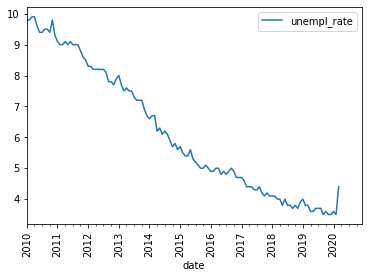

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


ur_wide =pd.DataFrame(columns=['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], data=[['2010', 9.8, 9.8, 9.9, 9.9, 9.6, 9.4, 9.4, 9.5, 9.5, 9.4, 9.8,
        9.3],
       ['2011', 9.1, 9.0, 9.0, 9.1, 9.0, 9.1, 9.0, 9.0, 9.0, 8.8, 8.6,
        8.5],
       ['2012', 8.3, 8.3, 8.2, 8.2, 8.2, 8.2, 8.2, 8.1, 7.8, 7.8, 7.7,
        7.9],
       ['2013', 8.0, 7.7, 7.5, 7.6, 7.5, 7.5, 7.3, 7.2, 7.2, 7.2, 6.9,
        6.7],
       ['2014', 6.6, 6.7, 6.7, 6.2, 6.3, 6.1, 6.2, 6.1, 5.9, 5.7, 5.8,
        5.6],
       ['2015', 5.7, 5.5, 5.4, 5.4, 5.6, 5.3, 5.2, 5.1, 5.0, 5.0, 5.1,
        5.0],
       ['2016', 4.9, 4.9, 5.0, 5.0, 4.8, 4.9, 4.8, 4.9, 5.0, 4.9, 4.7,
        4.7],
       ['2017', 4.7, 4.6, 4.4, 4.4, 4.4, 4.3, 4.3, 4.4, 4.2, 4.1, 4.2,
        4.1],
       ['2018', 4.1, 4.1, 4.0, 4.0, 3.8, 4.0, 3.8, 3.8, 3.7, 3.8, 3.7,
        3.9],
       ['2019', 4.0, 3.8, 3.8, 3.6, 3.6, 3.7, 3.7, 3.7, 3.5, 3.6, 3.5,
        3.5],
       ['2020', 3.6, 3.5, 4.4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
        np.nan]])

display(ur_wide.head())

# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars='year', var_name='month', value_name='unempl_rate')
print("\n\nur_wide.melt(id_vars='year', var_name='month', value_name='unempl_rate')")
display(ur_wide.melt(id_vars='year', var_name='month', value_name='unempl_rate').head())

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values(by='date')

display(ur_sorted.head())

# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate', rot=90)
plt.show()

# **Using .melt() for stocks vs bond performance**

It is widespread knowledge that 

<ins>***the price of bonds is inversely related to the price of stocks***</ins>. 

You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the `.melt()` method to reshape this table.

Additionally, you will use the `.query()` method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

* Use `.melt()` on `ten_yr` to unpivot everything except the metric column, setting `var_name='date'` and `value_name='close'`. Save the result to `bond_perc`.
* Using the `.query()` method, select only those rows were metric equals `'close'`, and save to `bond_perc_close`.
* Use `merge_ordered()` to merge `dji` (left table) and `bond_perc_close` on date with an inner join, and set `suffixes` equal to `('_dow', '_bond')`. Save the result to `dow_bond`.
* Using `dow_bond`, plot only the Dow and bond values.

ten_yr
(4, 36)


,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,2007-11-01,2007-12-01,2008-01-01,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,2008-12-01,2009-01-01,2009-02-01,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033491,-0.060449,0.025426,-0.004312,0.060632,0.027154,-0.059233,-0.046271,0.014400,-0.027080,-0.114703,0.022566,-0.094471,-0.024644,-0.021336,0.076018,0.073047,-0.020621,0.000000,-0.024099,-0.025734,0.050427,-0.267717,-0.235865,0.285974,0.045888,-0.102599,0.191049,0.106726,0.023966,-0.006687,-0.046564,-0.032068,0.034347,-0.050544
1,high,-0.007338,-0.040657,0.022046,0.030576,0.080268,-0.021633,-0.059796,-0.038446,0.003615,-0.055520,-0.039488,-0.053492,-0.022705,-0.064646,0.049676,0.064558,0.044697,-0.034690,-0.020125,-0.045232,0.052241,-0.035288,-0.271695,-0.010738,0.069328,-0.004257,0.041105,0.186987,0.068121,-0.061784,0.031864,-0.090324,0.012447,-0.004191,0.099327
2,low,-0.016147,-0.007984,0.031075,-0.002168,0.059105,-0.027288,-0.051677,-0.043372,0.002558,-0.108302,-0.001300,-0.145573,0.074672,-0.067499,0.043187,0.073469,0.047257,-0.022562,-0.001592,-0.136327,0.046154,-0.138235,-0.304437,0.059372,0.217230,-0.062405,0.068994,0.168185,0.123172,-0.055266,0.039510,-0.035946,-0.050733,0.030264,0.007188
3,close,-0.057190,0.021538,-0.003873,0.056156,0.029243,-0.052056,-0.049046,0.009257,-0.022712,-0.112402,0.015861,-0.098141,-0.028854,-0.028862,0.095280,0.076350,-0.016560,0.000000,-0.041719,0.003672,0.037366,-0.255164,-0.241123,0.267380,0.069269,-0.117067,0.163501,0.109155,0.016739,-0.006245,-0.028563,-0.027639,0.025703,-0.056309,0.200562



dji


,date,close
0,2007-02-01,0.005094
1,2007-03-01,-0.026139
2,2007-04-01,0.048525
3,2007-05-01,0.052007
4,2007-06-01,-0.016070





ten_yr.melt(id_vars='metric', var_name='date', value_name='close')


,metric,date,close
0,open,2007-02-01,0.033491
1,high,2007-02-01,-0.007338
2,low,2007-02-01,-0.016147
3,close,2007-02-01,-0.057190
4,open,2007-03-01,-0.060449





bond_perc.query('''metric == 'close' ''')


,metric,date,close
3,close,2007-02-01,-0.057190
7,close,2007-03-01,0.021538
11,close,2007-04-01,-0.003873
15,close,2007-05-01,0.056156
19,close,2007-06-01,0.029243





pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=['_dow', '_bond'])


,date,close_dow,metric,close_bond
0,2007-02-01,0.005094,close,-0.057190
1,2007-03-01,-0.026139,close,0.021538
2,2007-04-01,0.048525,close,-0.003873
3,2007-05-01,0.052007,close,0.056156
4,2007-06-01,-0.016070,close,0.029243


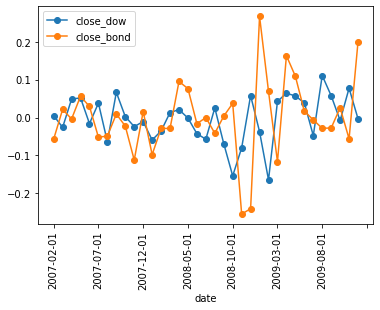

            close_dow  close_bond
close_dow    1.000000   -0.022288
close_bond  -0.022288    1.000000


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ten_yr = pd.DataFrame(columns=['metric',
 '2007-02-01',
 '2007-03-01',
 '2007-04-01',
 '2007-05-01',
 '2007-06-01',
 '2007-07-01',
 '2007-08-01',
 '2007-09-01',
 '2007-10-01',
 '2007-11-01',
 '2007-12-01',
 '2008-01-01',
 '2008-02-01',
 '2008-03-01',
 '2008-04-01',
 '2008-05-01',
 '2008-06-01',
 '2008-07-01',
 '2008-08-01',
 '2008-09-01',
 '2008-10-01',
 '2008-11-01',
 '2008-12-01',
 '2009-01-01',
 '2009-02-01',
 '2009-03-01',
 '2009-04-01',
 '2009-05-01',
 '2009-06-01',
 '2009-07-01',
 '2009-08-01',
 '2009-09-01',
 '2009-10-01',
 '2009-11-01',
 '2009-12-01'], data=[['open', 0.033490769, -0.060448691, 0.025425602000000002,
        -0.004312204, 0.060632307999999996, 0.02715394,
        -0.059232757000000004, -0.046270864, 0.014399646,
        -0.027080148999999998, -0.114702581, 0.022565922999999998,
        -0.09447061699999999, -0.024644031, -0.021336327999999998,
        0.07601835900000001, 0.073047187, -0.020621118, 0.0,
        -0.024099442000000002, -0.025734338, 0.05042689400000001,
        -0.267716535, -0.23586541800000002, 0.285973672,
        0.045887752000000004, -0.102598718, 0.191049267,
        0.10672560800000001, 0.023965762999999998, -0.006687099,
        -0.046563815, -0.032068255, 0.034346505, -0.050543637999999995],
       ['high', -0.007337954, -0.040657083999999996, 0.022046233,
        0.030575916, 0.08026823799999999, -0.021632807, -0.059796193,
        -0.038445808, 0.003615483, -0.055520237, -0.039488445,
        -0.053492175, -0.022704837000000002, -0.064646465, 0.049676026,
        0.064557613, 0.044696787, -0.034690102, -0.020124581000000002,
        -0.045232274, 0.052240717, -0.035288391, -0.27169525699999997,
        -0.01073779, 0.06932773099999999, -0.004256713,
        0.04110490000000001, 0.186986734, 0.068121341, -0.061783757,
        0.031864047, -0.090324241, 0.012446958999999999, -0.004191115,
        0.099326599],
       ['low', -0.016146629, -0.007984032, 0.031075341,
        -0.0021682570000000003, 0.059104737000000004, -0.027287649,
        -0.051676861, -0.043371886, 0.002557545, -0.10830241199999999,
        -0.00130039, -0.145572917, 0.074672356, -0.067498582,
        0.043187348, 0.073469388, 0.047256926, -0.022562241,
        -0.001591934, -0.13632739800000002, 0.046153846, -0.138235294,
        -0.30443686, 0.059371932999999995, 0.21723019899999998,
        -0.062404870999999994, 0.068993506, 0.16818527,
        0.12317192099999999, -0.055266204000000006, 0.039509954,
        -0.035945787, -0.050733495999999996, 0.030264005, 0.0071875],
       ['close', -0.05719022, 0.021538462, -0.003872633, 0.056155508,
        0.029243354, -0.052056427999999995, -0.049046322,
        0.009257218000000001, -0.022712383, -0.112402235, 0.015861027,
        -0.098141264, -0.028854081, -0.028862479, 0.09527972,
        0.076350093, -0.016559565, 0.0, -0.041719025, 0.00367165,
        0.037366083, -0.25516372800000003, -0.24112276, 0.267379679,
        0.069268636, -0.11706675400000001, 0.163500931, 0.10915493,
        0.016738817, -0.006244678, -0.028563268, -0.02763893,
        0.025703054, -0.056308962000000004, 0.200562324]])

dji = pd.DataFrame(columns=['date', 'close'], data=[['2007-02-01', 0.005094385],
       ['2007-03-01', -0.02613902],
       ['2007-04-01', 0.04852522],
       ['2007-05-01', 0.052007442],
       ['2007-06-01', -0.016070328000000002],
       ['2007-07-01', 0.038005504],
       ['2007-08-01', -0.063894742],
       ['2007-09-01', 0.066521287],
       ['2007-10-01', 0.002475632],
       ['2007-11-01', -0.024041665],
       ['2007-12-01', -0.01062883],
       ['2008-01-01', -0.059491712999999995],
       ['2008-02-01', -0.035595773],
       ['2008-03-01', 0.013213023],
       ['2008-04-01', 0.020871591999999998],
       ['2008-05-01', -0.00143428],
       ['2008-06-01', -0.042702328],
       ['2008-07-01', -0.057398135],
       ['2008-08-01', 0.025433807000000003],
       ['2008-09-01', -0.069100093],
       ['2008-10-01', -0.15418084599999998],
       ['2008-11-01', -0.080309949],
       ['2008-12-01', 0.058127134000000004],
       ['2009-01-01', -0.037496447999999995],
       ['2009-02-01', -0.16479474300000002],
       ['2009-03-01', 0.042397187999999995],
       ['2009-04-01', 0.064512765],
       ['2009-05-01', 0.05677603],
       ['2009-06-01', 0.038969204],
       ['2009-07-01', -0.047834178],
       ['2009-08-01', 0.11097163],
       ['2009-09-01', 0.05759352],
       ['2009-10-01', -0.007827874],
       ['2009-11-01', 0.07739017599999999],
       ['2009-12-01', -0.003478498],
       ['2010-01-01', -0.022410836],
       ['2010-02-01', 0.012850318999999999],
       ['2010-03-01', 0.050855723],
       ['2010-04-01', 0.01551093],
       ['2010-05-01', -0.080054868],
       ['2010-06-01', -0.035769399],
       ['2010-07-01', 0.078133736],
       ['2010-08-01', -0.034476195],
       ['2010-09-01', 0.067414235],
       ['2010-10-01', 0.023774684],
       ['2010-11-01', -0.002383415],
       ['2010-12-01', 0.039776433],
       ['2011-01-01', 0.031101532],
       ['2011-02-01', 0.014329031],
       ['2011-03-01', -0.0021388789999999998],
       ['2011-04-01', 0.032418077999999996],
       ['2011-05-01', 0.001198984],
       ['2011-06-01', -0.002194236],
       ['2011-07-01', 0.002626051],
       ['2011-08-01', -0.06695646],
       ['2011-09-01', -0.03640589],
       ['2011-10-01', 0.025681987000000003],
       ['2011-11-01', 0.001359161],
       ['2011-12-01', 0.045912125],
       ['2012-01-01', 0.052597849],
       ['2012-02-01', 0.017741846000000002],
       ['2012-03-01', 0.025919756000000002],
       ['2012-04-01', -0.009181033],
       ['2012-05-01', -0.053259198],
       ['2012-06-01', 0.034768257000000004],
       ['2012-07-01', -0.00014041799999999998],
       ['2012-08-01', 0.0350163],
       ['2012-09-01', 0.024247324],
       ['2012-10-01', -0.018273602],
       ['2012-11-01', -0.026968932],
       ['2012-12-01', 0.011859747],
       ['2013-01-01', 0.028023244],
       ['2013-02-01', 0.036520977999999996],
       ['2013-03-01', 0.023491879],
       ['2013-04-01', 0.037377411],
       ['2013-05-01', 0.016851552],
       ['2013-06-01', -0.000224894],
       ['2013-07-01', 0.025628287000000003],
       ['2013-08-01', -0.042491667999999996],
       ['2013-09-01', 0.028118227000000003],
       ['2013-10-01', 0.007576228000000001],
       ['2013-11-01', 0.032678999],
       ['2013-12-01', 0.018379701000000002],
       ['2014-01-01', 0.015901757],
       ['2014-02-01', -0.014940513],
       ['2014-03-01', 0.014771536000000002],
       ['2014-04-01', 0.007107820999999999],
       ['2014-05-01', 0.010994522],
       ['2014-06-01', 0.006544182],
       ['2014-07-01', -0.993017009],
       ['2014-08-01', 144.5183012],
       ['2014-09-01', -0.003245918],
       ['2014-10-01', 0.020395567],
       ['2014-11-01', 0.025168869],
       ['2014-12-01', -0.000286042],
       ['2015-01-01', -0.03692956],
       ['2015-02-01', 0.056382432],
       ['2015-03-01', -0.019666107],
       ['2015-04-01', 0.014750208],
       ['2015-05-01', -0.0015301639999999999],
       ['2015-06-01', -0.021720378999999998],
       ['2015-07-01', 0.006379318],
       ['2015-08-01', -0.067894606],
       ['2015-09-01', -0.025750218],
       ['2015-10-01', 0.096948254],
       ['2015-11-01', 0.003193047],
       ['2015-12-01', -0.016642328],
       ['2016-01-01', -0.055018607000000004],
       ['2016-02-01', 0.003048603],
       ['2016-03-01', 0.070753465],
       ['2016-04-01', 0.0050042129999999995],
       ['2016-05-01', 0.000765158],
       ['2016-06-01', 0.008028289000000001],
       ['2016-07-01', 0.02800888],
       ['2016-08-01', -0.001698052],
       ['2016-09-01', -0.005037860999999999],
       ['2016-10-01', -0.009055988000000001],
       ['2016-11-01', 0.054083208],
       ['2016-12-01', 0.033414211],
       ['2017-01-01', 0.005135964],
       ['2017-02-01', 0.047729302],
       ['2017-03-01', -0.007159263000000001],
       ['2017-04-01', 0.013420031],
       ['2017-05-01', 0.0032568090000000003],
       ['2017-06-01', 0.01622663],
       ['2017-07-01', 0.025363472999999997],
       ['2017-08-01', 0.002603798],
       ['2017-09-01', 0.020821848],
       ['2017-10-01', 0.04338742599999999],
       ['2017-11-01', 0.038293773999999996],
       ['2017-12-01', 0.01840769],
       ['2018-01-01', 0.057857909000000006],
       ['2018-02-01', -0.042838503],
       ['2018-03-01', -0.034663499],
       ['2018-04-01', 6.208199999999999e-05],
       ['2018-05-01', 0.010458144],
       ['2018-06-01', -0.005914219],
       ['2018-07-01', 0.047125374000000005],
       ['2018-08-01', 0.021624917],
       ['2018-09-01', 0.019006501000000002],
       ['2018-10-01', -0.05074022],
       ['2018-11-01', 0.016830012],
       ['2018-12-01', -0.08657517099999999],
       ['2019-01-01', 0.071683602],
       ['2019-02-01', 0.036652472],
       ['2019-03-01', 0.000490015],
       ['2019-04-01', 0.025616447999999997],
       ['2019-05-01', -0.066856205],
       ['2019-06-01', 0.07810595299999999],
       ['2019-07-01', np.nan],
       ['2019-08-01', np.nan],
       ['2019-09-01', np.nan],
       ['2019-10-01', 0.006778502],
       ['2019-11-01', np.nan],
       ['2019-12-01', np.nan],
       ['2020-01-01', np.nan],
       ['2020-02-01', -0.010447310999999999],
       ['2020-03-01', -0.216145511],
       ['2020-04-01', 0.034803753]])

print("ten_yr")
print(ten_yr.shape)
display(ten_yr.head())

print("\ndji")
display(dji.head())

# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')
print("\n\n\nten_yr.melt(id_vars='metric', var_name='date', value_name='close')")
display(ten_yr.melt(id_vars='metric', var_name='date', value_name='close').head())


# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query("metric == 'close'")
print("\n\n\nbond_perc.query('''metric == 'close' ''')")
display(bond_perc.query("metric == 'close'").head())

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=['_dow', '_bond'])
print("\n\n\npd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=['_dow', '_bond'])")
display(pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=['_dow', '_bond']).head())



# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90, marker='o')
plt.show()

print(dow_bond[['close_dow', 'close_bond']].corr())

The plot confirms that the bond and stock prices are inversely correlated. 